# SLO Twitter Data Analysis

### Joseph Jinn and Keith VanderLinden

<span style="font-family:Papyrus; font-size:1.25em;">
    
</p>This Jupyter Notebook provides an analysis of Twitter data obtained by CSIRO Data61 from a period of time covering 2012 through 2018.  The Twitter API was utilized to extract the raw Tweet data.  The first sections below cover the structure of the raw Tweet data with explanations of the various attributes (fields) and their associated values.  The latter sections showcase our analysis of the raw Tweet dataset as well as one of our preprocessed dataset in CSV format.<br>


TODO - text length statistics, whether user has description or not; is null equal = to empty string or not?

JSON --> CSV --> plot/describe data

fields: timestamp, tweet text, "retweet", in_reply_to, numeric value/remove string representation., CSV new derived column - Twitter URL that takes you directly to the Tweet:

flatten out the "user" data structure.

how long the tweet
whose tweeting them.

</span>

## Raw Json Twitter Dataset Tweet Structure:

<span style="font-family:Papyrus; font-size:1.25em;">

We utilize a single sample from the raw Twitter JSON dataset file in order to provide example values in the tables below.  Every Tweet in our raw dataset contains three JSON objects: the "tweet"; the "user"; and the "entities" object.  The "tweet" object encapsulates the other objects.  There may also be a "extended_entities" and "geo" object present in some Tweets depending on whether the Tweet contains native media such as photos, videos, etc., and whether they are geo-tagged.According to the Twitter API Documentation:

"Tweets are the basic atomic building block of all things Twitter. Tweets are also known as “status updates.” The Tweet object has a long list of ‘root-level’ attributes, including fundamental attributes such as id, created_at, and text. Tweet objects are also the ‘parent’ object to several child objects. Tweet child objects include user, entities, and extended_entities. Tweets that are geo-tagged will have a place child object." ("Tweet object - Twitter Developers")  Refer to the link below for further introductory information.<br>

https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object

</span>

### Main Tweet Object:

<span style="font-family:Papyrus; font-size:1.25em;">

The main Tweet object.  This contains all other sub-objects.  Any attribute an N/A (not applicable) example value indicates that the field was not present in the sample we are utilizing.  There are also some attributes present in our sample in the main Tweet object that are no longer present in the current up-to-date Tweet object from the Twitter API Documentation.  We will create a separate table for them.<br>

Note: change quoted status from N/A to valid.

</span>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-xldj{border-color:inherit;text-align:left}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-xldj">Attribute</th>
    <th class="tg-xldj">Value</th>
    <th class="tg-xldj">Description</th>
  </tr>
  <tr>
    <td class="tg-xldj">created_at</td>
    <td class="tg-xldj">"Sat Feb 23 03:40:21 +0000 2013"</td>
    <td class="tg-xldj">UTC time when this Tweet was created.</td>
  </tr>
  <tr>
    <td class="tg-xldj">id</td>
    <td class="tg-xldj">305160140833816576</td>
    <td class="tg-xldj">The integer representation of the unique identifier for this Tweet.</td>
  </tr>
  <tr>
    <td class="tg-xldj">id_str</td>
    <td class="tg-xldj">"305160140833816576"</td>
    <td class="tg-xldj">The string representation of the unique identifier for this Tweet.</td>
  </tr>
  <tr>
    <td class="tg-xldj">text</td>
    <td class="tg-xldj">N/A (not present in dataset)</td>
    <td class="tg-xldj">The actual UTF-8 text of the status update.</td>
  </tr>
  <tr>
    <td class="tg-xldj">source</td>
    <td class="tg-xldj">"&lt;a href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"&gt;Twitter for iPhone&lt;\/a&gt;"</td>
    <td class="tg-xldj">Utility used to post the Tweet, as an HTML-formatted string.</td>
  </tr>
  <tr>
    <td class="tg-xldj">truncated</td>
    <td class="tg-xldj">false</td>
    <td class="tg-xldj">Indicates whether the value of the text parameter was truncated, for example, as a result of a retweet exceeding the original Tweet text length limit of 140 characters. <br><br>Truncated text will end in ellipsis, like this ...<br><br>Since Twitter now rejects long Tweets vs truncating them, the large majority of Tweets will have this set to false. <br><br>Note that while native retweets may have their toplevel text property shortened, the original text will be available under the retweeted_status object <br>and the truncated parameter will be set to the value of the original status (in most cases, false).</td>
  </tr>
  <tr>
    <td class="tg-xldj">in_reply_to_status_id</td>
    <td class="tg-xldj">305159434462691328</td>
    <td class="tg-xldj">Nullable. If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID.</td>
  </tr>
  <tr>
    <td class="tg-xldj">in_reply_to_status_id_str</td>
    <td class="tg-xldj">"305159434462691328"</td>
    <td class="tg-xldj">Nullable. If the represented Tweet is a reply, this field will contain the string representation of the original Tweet’s ID.</td>
  </tr>
  <tr>
    <td class="tg-xldj">in_reply_to_user_id</td>
    <td class="tg-xldj">2768501</td>
    <td class="tg-xldj">Nullable. If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID. This will not necessarily always be the user directly mentioned in the Tweet.</td>
  </tr>
  <tr>
    <td class="tg-xldj">in_reply_to_user_id_str</td>
    <td class="tg-xldj">"2768501"</td>
    <td class="tg-xldj">Nullable. If the represented Tweet is a reply, this field will contain the string representation of the original Tweet’s author ID. This will not necessarily always be the user directly mentioned in the Tweet.</td>
  </tr>
  <tr>
    <td class="tg-xldj">in_reply_to_screen_name</td>
    <td class="tg-xldj">"abcnews"</td>
    <td class="tg-xldj">Nullable. If the represented Tweet is a reply, this field will contain the screen name of the original Tweet’s author.</td>
  </tr>
  <tr>
    <td class="tg-xldj">user</td>
    <td class="tg-xldj">Object containing a multitude of attributes.</td>
    <td class="tg-xldj">The user who posted this Tweet. See User data dictionary for complete list of attributes.</td>
  </tr>
  <tr>
    <td class="tg-xldj">coordinates</td>
    <td class="tg-xldj">Object containing a multitude of attributes.</td>
    <td class="tg-xldj">Nullable. Represents the geographic location of this Tweet as reported by the user or client application. The inner coordinates array is formatted as <br><a href="http://www.geojson.org/">geoJSON </a>(longitude first, then latitude).</td>
  </tr>
  <tr>
    <td class="tg-xldj">place</td>
    <td class="tg-xldj">Object containing a multitude of attributes.</td>
    <td class="tg-xldj">Nullable When present, indicates that the tweet is associated (but not necessarily originating from) a <br><a href="https://developer.twitter.com/overview/api/places">Place </a>.</td>
  </tr>
  <tr>
    <td class="tg-xldj">quoted_status_id</td>
    <td class="tg-xldj">N/A (empty for our sample but present)</td>
    <td class="tg-xldj">This field only surfaces when the Tweet is a quote Tweet. This field contains the integer value Tweet ID of the quoted Tweet.</td>
  </tr>
  <tr>
    <td class="tg-xldj">quoted_status_id_str</td>
    <td class="tg-xldj">N/A (empty for our sample but present)</td>
    <td class="tg-xldj">This field only surfaces when the Tweet is a quote Tweet. This is the string representation Tweet ID of the quoted Tweet.</td>
  </tr>
  <tr>
    <td class="tg-xldj">is_quote_status</td>
    <td class="tg-xldj">false</td>
    <td class="tg-xldj">Indicates whether this is a Quoted Tweet.</td>
  </tr>
  <tr>
    <td class="tg-xldj">quoted_status</td>
    <td class="tg-xldj">N/A (empty for our sample but present)</td>
    <td class="tg-xldj">This field only surfaces when the Tweet is a quote Tweet. This attribute contains the Tweet object of the original Tweet that was quoted.</td>
  </tr>
  <tr>
    <td class="tg-xldj">retweeted_status</td>
    <td class="tg-xldj">N/A (empty for our sample but present)</td>
    <td class="tg-xldj">Users can amplify the broadcast of Tweets authored by other users by <a href="https://developer.twitter.com/rest/reference/post/statuses/retweet/%3Aid">retweeting</a>. <br><br>Retweets can be distinguished from typical Tweets by the existence of a retweeted_status attribute. <br><br>This attribute contains a representation of the original Tweet that was retweeted. <br><br>Note that retweets of retweets do not show representations of the intermediary retweet, but only the original Tweet. <br>(Users can also <a href="https://developer.twitter.com/rest/reference/post/statuses/destroy/%3Aid">unretweet </a>a retweet they created by deleting their retweet.)</td>
  </tr>
  <tr>
    <td class="tg-xldj">quote_count</td>
    <td class="tg-xldj">N/A (not present in dataset)</td>
    <td class="tg-xldj">Nullable. Indicates approximately how many times this Tweet has been quoted by Twitter users.</td>
  </tr>
  <tr>
    <td class="tg-xldj">reply_count</td>
    <td class="tg-xldj">N/A (not present in dataset)</td>
    <td class="tg-xldj">Number of times this Tweet has been replied to.</td>
  </tr>
  <tr>
    <td class="tg-xldj">retweet_count</td>
    <td class="tg-xldj">0</td>
    <td class="tg-xldj">Number of times this Tweet has been retweeted.</td>
  </tr>
  <tr>
    <td class="tg-xldj">favorite_count</td>
    <td class="tg-xldj">0</td>
    <td class="tg-xldj">Nullable. Indicates approximately how many times this Tweet has been <br><a href="https://developer.twitter.com/rest/reference/post/favorites/create">liked </a>by Twitter users.</td>
  </tr>
  <tr>
    <td class="tg-0pky">entities</td>
    <td class="tg-0pky">Object containing a multitude of attributes.</td>
    <td class="tg-0pky">Entities which have been parsed out of the text of the Tweet. Additionally see <br><a href="https://developer.twitter.com/overview/api/entities-in-twitter-objects">Entities in Twitter Objects </a>.</td>
  </tr>
  <tr>
    <td class="tg-0pky">extended_entities</td>
    <td class="tg-0pky">Object containing a multitude of attributes.</td>
    <td class="tg-0pky">When between one and four native photos or one video or one animated GIF are in Tweet, contains an array 'media' metadata. <br><br>This is also available in Quote Tweets. Additionally see <a href="https://developer.twitter.com/overview/api/entities-in-twitter-objects">Entities in Twitter Objects </a>.</td>
  </tr>
  <tr>
    <td class="tg-0pky">favorited</td>
    <td class="tg-0pky">false</td>
    <td class="tg-0pky">Nullable. Indicates whether this Tweet has been liked by the authenticating user.</td>
  </tr>
  <tr>
    <td class="tg-0pky">retweeted</td>
    <td class="tg-0pky">false</td>
    <td class="tg-0pky">Indicates whether this Tweet has been Retweeted by the authenticating user.</td>
  </tr>
  <tr>
    <td class="tg-0pky">possibly_sensitive</td>
    <td class="tg-0pky">N/A (empty for our sample but present)</td>
    <td class="tg-0pky">Nullable. This field only surfaces when a Tweet contains a link. <br><br>The meaning of the field doesn’t pertain to the Tweet content itself, <br>but instead it is an indicator that the URL contained in the Tweet may contain content or media identified as sensitive content.</td>
  </tr>
  <tr>
    <td class="tg-0pky">filter_level</td>
    <td class="tg-0pky">N/A (not present in dataset)</td>
    <td class="tg-0pky">Indicates the maximum value of the <a href="https://developer.twitter.com/streaming/overview/request-parameters#filter_level">filter_level </a>parameter which may be used and still stream this Tweet. <br><br>So a value of medium will be streamed on none, low, and medium streams.</td>
  </tr>
  <tr>
    <td class="tg-0pky">lang</td>
    <td class="tg-0pky">"en"</td>
    <td class="tg-0pky">Nullable. When present, indicates a <a href="http://tools.ietf.org/html/bcp47">BCP 47 </a>language identifier corresponding to the machine-detected language of the Tweet text, <br>or und if no language could be detected. See more documentation <a href="http://support.gnip.com/apis/powertrack2.0/rules.html#Operators">HERE</a>.</td>
  </tr>
  <tr>
    <td class="tg-0pky">matching_rules</td>
    <td class="tg-0pky">N/A (not present in dataset)</td>
    <td class="tg-0pky">Present in filtered products such as Twitter Search and PowerTrack. <br><br>Provides the id and tag associated with the rule that matched the Tweet. <br><br>With PowerTrack, more than one rule can match a Tweet. See more documentation <a href="http://support.gnip.com/enrichments/matching_rules.html">HERE</a>.</td>
  </tr>
</table>

<span style="font-family:Papyrus; font-size:1.25em;">

The "text" attribute should contain the full raw text of the Tweet but in our sample Tweet from our dataset it is instead contained in the "full_text" field.<br>

</span>

### Main Tweet Object - Attributes present in our Sample and Dataset but not in Twitter API Docs for the Main Tweet Object:

<span style="font-family:Papyrus; font-size:1.25em;">

These are the attributes we noticed that are present in our sample in the main Tweet object but are not listed as being part of the main Tweet object in the current Twitter API Documentation.<br>

</span>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-s268{text-align:left}
</style>
<table class="tg">
  <tr>
    <th class="tg-s268">Attribute</th>
    <th class="tg-s268">Value</th>
    <th class="tg-s268">Description</th>
  </tr>
  <tr>
    <td class="tg-s268">"full_text":</td>
    <td class="tg-s268">"@abcnews About bloody time. Adani only wants FIFO Indian workers for his Bowen basin mines."</td>
    <td class="tg-s268">Replaces "text" in the Extended Mode of&nbsp;&nbsp;REST API endpoints.</td>
  </tr>
  <tr>
    <td class="tg-s268">"display_text_range":</td>
    <td class="tg-s268">[0,91]</td>
    <td class="tg-s268">Part of the "extended_tweet" attribute for streaming API's.</td>
  </tr>
  <tr>
    <td class="tg-s268">"contributors":</td>
    <td class="tg-s268">null</td>
    <td class="tg-s268">Can't find description for this exact field in the documentation.</td>
  </tr>
</table>

<span style="font-family:Papyrus; font-size:1.25em;">

Refer to the link below for more information on these fields.  We couldn't find any information on the "contributors" field however.  It maybe have been removed and is no longer listed in the Twitter API Documentation.<br>

https://developer.twitter.com/en/docs/tweets/tweet-updates.html

</span>

### Main Tweet Object - Additional Attributes

<span style="font-family:Papyrus; font-size:1.25em;">

These are additional attributes listed in the Twitter API Documentation for the main Tweet object.  They are not present in the sample we use from our raw Twitter dataset.<br>

</span>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-xldj{border-color:inherit;text-align:left}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-xldj">Attribute</th>
    <th class="tg-xldj">Value</th>
    <th class="tg-xldj">Description</th>
  </tr>
  <tr>
    <td class="tg-xldj">current_user_retweet</td>
    <td class="tg-xldj">N/A (not present in dataset)</td>
    <td class="tg-xldj">Perspectival Only surfaces on methods supporting the include_my_retweet parameter, when set to true. Details the Tweet ID of the user’s own retweet (if existent) of this Tweet.</td>
  </tr>
  <tr>
    <td class="tg-xldj">scopes</td>
    <td class="tg-xldj">N/A (not present in dataset)</td>
    <td class="tg-xldj">A set of key-value pairs indicating the intended contextual delivery of the containing Tweet. Currently used by Twitter’s Promoted Products.</td>
  </tr>
  <tr>
    <td class="tg-xldj">withheld_copyright</td>
    <td class="tg-xldj">N/A (not present in dataset)</td>
    <td class="tg-xldj">When present and set to “true”, it indicates that this piece of content has been withheld due to a <br><a href="http://en.wikipedia.org/wiki/Digital_Millennium_Copyright_Act">DMCA complaint </a>.</td>
  </tr>
  <tr>
    <td class="tg-0pky">withheld_in_countries</td>
    <td class="tg-0pky">N/A (not present in dataset)</td>
    <td class="tg-0pky">When present, indicates a list of uppercase <a href="http://en.wikipedia.org/wiki/ISO_3166-1_alpha-2">two-letter country codes </a>this content is withheld from.</td>
  </tr>
  <tr>
    <td class="tg-0pky">withheld_scope</td>
    <td class="tg-0pky">N/A (not present in dataset)</td>
    <td class="tg-0pky">When present, indicates whether the content being withheld is the “status” or a “user.”</td>
  </tr>
  <tr>
    <td class="tg-0pky">geo</td>
    <td class="tg-0pky">N/A (not present in dataset)</td>
    <td class="tg-0pky"><span style="font-weight:700">Deprecated.</span><br><span style="font-weight:700"> </span><br>Nullable. Use the coordinates field instead. This deprecated attribute has its coordinates formatted as [lat, long], while all other Tweet geo is formatted as [long, lat].</td>
  </tr>
</table>

<span style="font-family:Papyrus; font-size:1.25em;">

It appears the "geo" object is now deprecated.  However, our raw Twitter dataset does contain the "geo" field for some Tweets so apparently it was not outdated at the time CSIRO was still collecting this data.<br>

</span>

### User Object within the Main Tweet Object:

<span style="font-family:Papyrus; font-size:1.25em;">

This is the "user" object nested within the main Tweet object.  It is a large data structure containing a multitude of attributes and their corresponding values.  Extraction of just the "user" object resulted in a CSV file over 1.0 GBS in file size.  Refer to the link below for more in-depth information concerning "user".<br>

https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/user-object

</span>

#### Non-Deprecated Fields within the User Object:

<span style="font-family:Papyrus; font-size:1.25em;">

These are the non-deprecated attributes currently in use as of June 14, 2019.  Any attribute without a sample value indicates that the attribute was not present in the sample we extracted from our raw Tweet dataset.<br>

</span>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-xldj{border-color:inherit;text-align:left}
</style>
<table class="tg">
  <tr>
    <th class="tg-xldj">Attribute</th>
    <th class="tg-xldj">Value</th>
    <th class="tg-xldj">Description</th>
  </tr>
  <tr>
    <td class="tg-xldj">id</td>
    <td class="tg-xldj">772466924</td>
    <td class="tg-xldj">The integer representation of the unique identifier for this User.</td>
  </tr>
  <tr>
    <td class="tg-xldj">id_str</td>
    <td class="tg-xldj">"772466924"</td>
    <td class="tg-xldj">The string representation of the unique identifier for this User.</td>
  </tr>
  <tr>
    <td class="tg-xldj">name</td>
    <td class="tg-xldj">"Daryl Dickson"</td>
    <td class="tg-xldj">The name of the user, as they’ve defined it. Not necessarily a person’s name. Typically capped at 50 characters, but subject to change.</td>
  </tr>
  <tr>
    <td class="tg-xldj">screen_name</td>
    <td class="tg-xldj">"DazzDicko"</td>
    <td class="tg-xldj">The screen name, handle, or alias that this user identifies themselves with. screen_names are unique but subject to change. Typically a maximum of 15 characters long, but some historical accounts may exist with longer names.</td>
  </tr>
  <tr>
    <td class="tg-xldj">location</td>
    <td class="tg-xldj">"Far North Queensland"</td>
    <td class="tg-xldj">Nullable . The user-defined location for this account’s profile. Not necessarily a location, nor machine-parseable.</td>
  </tr>
  <tr>
    <td class="tg-xldj">derived</td>
    <td class="tg-xldj">N/A (not present in our dataset)</td>
    <td class="tg-xldj">Enterprise APIs only Collection of Enrichment metadata derived for user. Provides the <br><a href="https://developer.twitter.com/en/docs/tweets/enrichments/overview/profile-geo">Profile Geo </a>Enrichment metadata.</td>
  </tr>
  <tr>
    <td class="tg-xldj">url</td>
    <td class="tg-xldj">null</td>
    <td class="tg-xldj">Nullable . A URL provided by the user in association with their profile.</td>
  </tr>
  <tr>
    <td class="tg-xldj">description</td>
    <td class="tg-xldj">"Train Driver extraordinaire, proud Union Leftie and Labor supporter. Cant stand the LNP and their regressive ideas. Mainly political but I do enjoy a laugh."</td>
    <td class="tg-xldj">Nullable . The user-defined UTF-8 string describing their account.</td>
  </tr>
  <tr>
    <td class="tg-xldj">protected</td>
    <td class="tg-xldj">false</td>
    <td class="tg-xldj">When true, indicates that this user has chosen to protect their Tweets.</td>
  </tr>
  <tr>
    <td class="tg-xldj">verified</td>
    <td class="tg-xldj">false</td>
    <td class="tg-xldj">When true, indicates that the user has a verified account. See <br><a href="https://support.twitter.com/articles/119135-faqs-about-verified-accounts">Verified Accounts </a>.</td>
  </tr>
  <tr>
    <td class="tg-xldj">followers_count</td>
    <td class="tg-xldj">945</td>
    <td class="tg-xldj">The number of followers this account currently has. Under certain conditions of duress, this field will temporarily indicate “0”.</td>
  </tr>
  <tr>
    <td class="tg-xldj">friends_count</td>
    <td class="tg-xldj">1385</td>
    <td class="tg-xldj">The number of users this account is following (AKA their “followings”). Under certain conditions of duress, this field will temporarily indicate “0”.</td>
  </tr>
  <tr>
    <td class="tg-xldj">listed_count</td>
    <td class="tg-xldj">3</td>
    <td class="tg-xldj">The number of public lists that this user is a member of.</td>
  </tr>
  <tr>
    <td class="tg-xldj">favourites_count</td>
    <td class="tg-xldj">533</td>
    <td class="tg-xldj">The number of Tweets this user has liked in the account’s lifetime.</td>
  </tr>
  <tr>
    <td class="tg-xldj">statuses_count</td>
    <td class="tg-xldj">5176</td>
    <td class="tg-xldj">The number of Tweets (including retweets) issued by the user.</td>
  </tr>
  <tr>
    <td class="tg-xldj">created_at</td>
    <td class="tg-xldj">"Tue Aug 21 23:23:52 +0000 2012"</td>
    <td class="tg-xldj">The UTC datetime that the user account was created on Twitter.</td>
  </tr>
  <tr>
    <td class="tg-xldj">profile_banner_url</td>
    <td class="tg-xldj">N/A (empty for our sample but present)</td>
    <td class="tg-xldj">The HTTPS-based URL pointing to the standard web representation of the user’s uploaded profile banner.</td>
  </tr>
  <tr>
    <td class="tg-xldj">profile_image_url_https</td>
    <td class="tg-xldj">"https://pbs.twimg.com/profile_images/698290934618787840/SIpBKnWE_normal.jpg"</td>
    <td class="tg-xldj">A HTTPS-based URL pointing to the user’s profile image.</td>
  </tr>
  <tr>
    <td class="tg-xldj">default_profile</td>
    <td class="tg-xldj">true</td>
    <td class="tg-xldj">When true, indicates that the user has not altered the theme or background of their user profile.</td>
  </tr>
  <tr>
    <td class="tg-xldj">default_profile_image</td>
    <td class="tg-xldj">false</td>
    <td class="tg-xldj">When true, indicates that the user has not uploaded their own profile image and a default image is used instead.</td>
  </tr>
  <tr>
    <td class="tg-xldj">withheld_in_countries</td>
    <td class="tg-xldj">N/A (empty for our sample but present)</td>
    <td class="tg-xldj">When present, indicates a list of uppercase <br><a href="http://en.wikipedia.org/wiki/ISO_3166-1_alpha-2">two-letter country codes </a>this content is withheld from.</td>
  </tr>
  <tr>
    <td class="tg-xldj">withheld_scope</td>
    <td class="tg-xldj">N/A (not present in our dataset)</td>
    <td class="tg-xldj">When present, indicates that the content being withheld is a “user.”</td>
  </tr>
</table>

#### Deprecated Fields within the User Object:

<span style="font-family:Papyrus; font-size:1.25em;">
 
These are the deprecated attributes that are no longer in use.  Any attribute without a sample value indicates that the attribute was not present in the sample we extracted from our raw Tweet dataset.<br>
 
<span>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-xldj{border-color:inherit;text-align:left}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-xldj">Attribute</th>
    <th class="tg-xldj">Value</th>
    <th class="tg-xldj">Description</th>
  </tr>
  <tr>
    <td class="tg-xldj">utc_offset</td>
    <td class="tg-xldj">36000</td>
    <td class="tg-xldj">Value will be set to null. Still available via <br><a href="https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/en/docs/accounts-and-users/manage-account-settings/api-reference/get-account-settings">GET account/settings</a></td>
  </tr>
  <tr>
    <td class="tg-xldj">time_zone</td>
    <td class="tg-xldj">"Australia/Brisbane"</td>
    <td class="tg-xldj">Value will be set to null. Still available via <br><a href="https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/en/docs/accounts-and-users/manage-account-settings/api-reference/get-account-settings">GET account/settings </a>as tzinfo_name</td>
  </tr>
  <tr>
    <td class="tg-xldj">lang</td>
    <td class="tg-xldj">"en"</td>
    <td class="tg-xldj">Value will be set to null. Still available via <br><a href="https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/en/docs/accounts-and-users/manage-account-settings/api-reference/get-account-settings">GET account/settings </a>as language</td>
  </tr>
  <tr>
    <td class="tg-xldj">geo_enabled</td>
    <td class="tg-xldj">true</td>
    <td class="tg-xldj">Value will be set to null.  Still available via <br><a href="https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/en/docs/accounts-and-users/manage-account-settings/api-reference/get-account-settings">GET account/settings</a>. This field must be true for the current user to attach geographic data when using <br><a href="https://developer.twitter.com/en/docs/tweets/post-and-engage/guides/post-tweet-geo-guide">POST statuses / update</a></td>
  </tr>
  <tr>
    <td class="tg-xldj">following</td>
    <td class="tg-xldj">false</td>
    <td class="tg-xldj">Value will be set to null. Still available via <br><a href="https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/en/docs/accounts-and-users/follow-search-get-users/api-reference/get-friendships-lookup">GET friendships/lookup</a></td>
  </tr>
  <tr>
    <td class="tg-xldj">follow_request_sent</td>
    <td class="tg-xldj">false</td>
    <td class="tg-xldj">Value will be set to null. Still available via <br><a href="https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/en/docs/accounts-and-users/follow-search-get-users/api-reference/get-friendships-lookup">GET friendships/lookup</a></td>
  </tr>
  <tr>
    <td class="tg-xldj">has_extended_profile</td>
    <td class="tg-xldj">N/A (empty for our sample but present)</td>
    <td class="tg-xldj"><span style="font-weight:700">Deprecated</span><br>. Value will be set to null.</td>
  </tr>
  <tr>
    <td class="tg-xldj">notifications</td>
    <td class="tg-xldj">false</td>
    <td class="tg-xldj"><span style="font-weight:700">Deprecated</span><br>. Value will be set to null.</td>
  </tr>
  <tr>
    <td class="tg-xldj">profile_location</td>
    <td class="tg-xldj">N/A (not present in our dataset)</td>
    <td class="tg-xldj"><span style="font-weight:700">Deprecated</span><br>. Value will be set to null.</td>
  </tr>
  <tr>
    <td class="tg-xldj">contributors_enabled</td>
    <td class="tg-xldj">false</td>
    <td class="tg-xldj"><span style="font-weight:700">Deprecated</span><br>. Value will be set to null.</td>
  </tr>
  <tr>
    <td class="tg-xldj">profile_image_url</td>
    <td class="tg-xldj">"http://pbs.twimg.com/profile_images/698290934618787840/SIpBKnWE_normal.jpg"</td>
    <td class="tg-xldj"><span style="font-weight:700">Deprecated</span><br>. Value will be set to null. NOTE: Profile images are only available using the profile_image_url_https field.</td>
  </tr>
  <tr>
    <td class="tg-xldj">profile_background_color</td>
    <td class="tg-xldj">N/A (empty for our sample but present)</td>
    <td class="tg-xldj"><span style="font-weight:700">Deprecated</span><br>. Value will be set to null.</td>
  </tr>
  <tr>
    <td class="tg-xldj">profile_background_image_url</td>
    <td class="tg-xldj">"http://abs.twimg.com/images/themes/theme1/bg.png"</td>
    <td class="tg-xldj"><span style="font-weight:700">Deprecated</span><br>. Value will be set to null.</td>
  </tr>
  <tr>
    <td class="tg-xldj">profile_background_image_url_https</td>
    <td class="tg-xldj">"https://abs.twimg.com/images/themes/theme1/bg.png"</td>
    <td class="tg-xldj"><span style="font-weight:700">Deprecated</span><br>. Value will be set to null.</td>
  </tr>
  <tr>
    <td class="tg-xldj">profile_background_tile</td>
    <td class="tg-xldj">false</td>
    <td class="tg-xldj"><span style="font-weight:700">Deprecated</span><br>. Value will be set to null.</td>
  </tr>
  <tr>
    <td class="tg-xldj">profile_link_color</td>
    <td class="tg-xldj">"1DA1F2"</td>
    <td class="tg-xldj"><span style="font-weight:700">Deprecated</span><br>. Value will be set to null.</td>
  </tr>
  <tr>
    <td class="tg-xldj">profile_sidebar_border_color</td>
    <td class="tg-xldj">"C0DEED"</td>
    <td class="tg-xldj"><span style="font-weight:700">Deprecated</span><br>. Value will be set to null.</td>
  </tr>
  <tr>
    <td class="tg-xldj">profile_sidebar_fill_color</td>
    <td class="tg-xldj">"DDEEF6"</td>
    <td class="tg-xldj"><span style="font-weight:700">Deprecated</span><br>. Value will be set to null.</td>
  </tr>
  <tr>
    <td class="tg-xldj">profile_text_color</td>
    <td class="tg-xldj">"333333"</td>
    <td class="tg-xldj"><span style="font-weight:700">Deprecated</span><br>. Value will be set to null.</td>
  </tr>
  <tr>
    <td class="tg-xldj">profile_use_background_image</td>
    <td class="tg-xldj">true</td>
    <td class="tg-xldj"><span style="font-weight:700">Deprecated</span><br>. Value will be set to null.</td>
  </tr>
  <tr>
    <td class="tg-xldj">is_translator</td>
    <td class="tg-xldj">false</td>
    <td class="tg-xldj"><span style="font-weight:700">Deprecated</span><br>. Value will be set to null.</td>
  </tr>
  <tr>
    <td class="tg-xldj">is_translation_enabled</td>
    <td class="tg-xldj">false</td>
    <td class="tg-xldj"><span style="font-weight:700">Deprecated</span><br>. Value will be set to null.</td>
  </tr>
  <tr>
    <td class="tg-0pky">translator_type</td>
    <td class="tg-0pky">"none"</td>
    <td class="tg-0pky"><span style="font-weight:700">Deprecated</span><br>. Value will be set to null.</td>
  </tr>
</table>

<span style="font-family:Papyrus; font-size:1.25em;">

Our dataset was gathered over the course of 10 years so it stands to reason that Twiter has deprecated some of the fields that were used, added fields, and changed other fields.  The Twitter API Documentation do not give a description of the former purpose of these deprecated fields.<br>

</span>

### Entities Object within the Main Tweet Object:

<span style="font-family:Papyrus; font-size:1.25em;">

This is the "entities" object for a Tweet within our dataset.  All the Lists are empty except for "user_mentions" which is a List containing a Dictionary of key-value pairs of various attributes.  It should be noted that each of these attributes are actually Objects themselves with multiple key (attribute)-value pairs within.  For a more in-depth listing of the attributes and format, please refer to the link below.<br>

https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/entities-object

</span>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-xldj{border-color:inherit;text-align:left}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-xldj">Attribute</th>
    <th class="tg-xldj">Value</th>
    <th class="tg-xldj">Description</th>
  </tr>
  <tr>
    <td class="tg-xldj">urls</td>
    <td class="tg-xldj">[]</td>
    <td class="tg-xldj">Represents URLs included in the text of a Tweet.</td>
  </tr>
  <tr>
    <td class="tg-xldj">hashtags</td>
    <td class="tg-xldj">[]</td>
    <td class="tg-xldj">Represents hashtags which have been parsed out of the Tweet text.</td>
  </tr>
  <tr>
    <td class="tg-xldj">user_mentions</td>
    <td class="tg-xldj">[{"indices":[0,8],"screen_name":"abcnews","id_str":"2768501", "name":"ABC News","id":2768501}]</td>
    <td class="tg-xldj">Represents other Twitter users mentioned in the text of the Tweet.</td>
  </tr>
  <tr>
    <td class="tg-xldj">symbols</td>
    <td class="tg-xldj">[]</td>
    <td class="tg-xldj">Represents symbols, i.e. $cashtags, included in the text of the Tweet.</td>
  </tr>
  <tr>
    <td class="tg-0pky">media</td>
    <td class="tg-0pky">[]</td>
    <td class="tg-0pky">Represents media elements uploaded with the Tweet.</td>
  </tr>
  <tr>
    <td class="tg-0pky">polls</td>
    <td class="tg-0pky">[]</td>
    <td class="tg-0pky">Represents Twitter Polls included in the Tweet.</td>
  </tr>
</table>

<span style="font-family:Papyrus; font-size:1.25em;">

For the sample we have chosen, only the "url", "hashtags", "user_mentions", and "symbols" fields were present, even though most are empty.  The other fields in the table were not present in the "entities" object for this particular Tweet.<br>

</span>

### Extended Entities Object within the Main Tweet Object:

<span style="font-family:Papyrus; font-size:1.25em;">
    
This element is present in any Tweet that contains "native media" such as photos, videos, images, etc.  It is an object type that contains all the metadata for each of the native media elemnts present in the Tweet.<br>

Refer to the link below for all the particulars on the "extended_entities" object.<br>

https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/extended-entities-object

</span>

<span style="font-family:Papyrus; font-size:1.25em;">
    
{"extended_entities":{"media":[{"display_url":"pic.twitter.com\/NcnlVdBAxt","indices":[110,132],"sizes":{"small":{"w":406,"h":680,"resize":"fit"},"large":{"w":448,"h":750,"resize":"fit"},"thumb":{"w":150,"h":150,"resize":"crop"},"medium":{"w":448,"h":750,"resize":"fit"}},"id_str":"394955471976538112","expanded_url":"https:\/\/twitter.com\/fightforthereef\/status\/394955472064622593\/photo\/1","media_url_https":"https:\/\/pbs.twimg.com\/media\/BXsp6MFCIAA4Zet.png","id":394955471976538112,"type":"photo","media_url":"http:\/\/pbs.twimg.com\/media\/BXsp6MFCIAA4Zet.png","url":"http:\/\/t.co\/NcnlVdBAxt"}]}

</span>

<span style="font-family:Papyrus; font-size:1.25em;">
    
The above is a sample of an "extended_entities" object from a Tweet in our dataset.  Ths object was found as the value for the "retweeted_status" key.  We forgot building a table for all the attributes in this object as the Twitter API Documentation does not itself have a table listing each attribute, example values, and a description explaining each.<br>
    
</span>

<span style="font-family:Papyrus; font-size:1.25em;">
    
</span>

### Geo Object within the Main Tweet Object:

<span style="font-family:Papyrus; font-size:1.25em;">

The "geo" sub-object within the main Tweet object is comprised of the "coordinates" and "place" objects.  According to the Twitter API documentation,<br>

"The place object is always present when a Tweet is geo-tagged, while the coordinates object is only present (non-null) when the Tweet is assigned an exact location. If an exact location is provided, the coordinates object will provide a [long, lat] array with the geographical coordinates, and a Twitter Place that corresponds to that location will be assigned." ("Geo objects - Twitter Developers")<br>

Therfore, not every Tweet will necessarily possess both or either objects.<br>

</span>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-s268{text-align:left}
</style>
<table class="tg">
  <tr>
    <th class="tg-s268">Attribute</th>
    <th class="tg-s268">Value</th>
    <th class="tg-s268">Description</th>
  </tr>
  <tr>
    <td class="tg-s268">place</td>
    <td class="tg-s268">{}</td>
    <td class="tg-s268">Places are specific, named locations with corresponding geo coordinates.</td>
  </tr>
  <tr>
    <td class="tg-s268">coordinates</td>
    <td class="tg-s268">{}</td>
    <td class="tg-s268">An array of longitude and latitude coordinates.&nbsp;&nbsp;May also include a type attribute.</td>
  </tr>
</table>

<span style="font-family:Papyrus; font-size:1.25em;">

Refer to the link below for a specific explanation of how "place" and "coordinates" are utilized together for geo-tagged Tweet objects.<br>

https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/geo-objects

</span>

#### Coordinates Object within the Geo Object:

<span style="font-family:Papyrus; font-size:1.25em;">

The "coordinates" object for geo-tagged Tweets contains the two attributes as described below.<br>

</span>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-s268{text-align:left}
</style>
<table class="tg">
  <tr>
    <th class="tg-s268">Attribute</th>
    <th class="tg-s268">Value</th>
    <th class="tg-s268">Description</th>
  </tr>
  <tr>
    <td class="tg-s268">coordinates</td>
    <td class="tg-s268"><span style="font-style:italic">[-97.51087576,35.46500176]</span></td>
    <td class="tg-s268">The longitude and latitude of the Tweet’s location, as a collection in the form <br><span style="font-weight:700">[longitude, latitude]</span>.</td>
  </tr>
  <tr>
    <td class="tg-s268">type</td>
    <td class="tg-s268">"Point"</td>
    <td class="tg-s268">The type of data encoded in the coordinates property. This will be “Point” for Tweet coordinates fields.</td>
  </tr>
</table>

<span style="font-family:Papyrus; font-size:1.25em;">


The values are examples copied from the Twitter API Documentation on "geo" objects.<br>

</span>

#### Place Object within the Geo Object:

<span style="font-family:Papyrus; font-size:1.25em;">
    
</span>

<span style="font-family:Papyrus; font-size:1.25em;">

The "place" object for geo-tagged Tweets contains the following attributes as describe below.<br>

</span>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-xldj{border-color:inherit;text-align:left}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-xldj">Attribute</th>
    <th class="tg-xldj">Value</th>
    <th class="tg-xldj">Description</th>
  </tr>
  <tr>
    <td class="tg-xldj">id</td>
    <td class="tg-xldj">"01a9a39529b27f36"</td>
    <td class="tg-xldj">ID representing this place. Note that this is represented as a string, not an integer.</td>
  </tr>
  <tr>
    <td class="tg-xldj">url</td>
    <td class="tg-xldj">"https://api.twitter.com/1.1/geo/id/01a9a39529b27f36.json"</td>
    <td class="tg-xldj">URL representing the location of additional place metadata for this place.</td>
  </tr>
  <tr>
    <td class="tg-0pky">place_type</td>
    <td class="tg-0pky">"city"</td>
    <td class="tg-0pky">The type of location represented by this place.</td>
  </tr>
  <tr>
    <td class="tg-0pky">name</td>
    <td class="tg-0pky">"Manhattan"</td>
    <td class="tg-0pky">Short human-readable representation of the place’s name.</td>
  </tr>
  <tr>
    <td class="tg-0pky">full_name</td>
    <td class="tg-0pky">"Manhattan, NY"</td>
    <td class="tg-0pky">Full human-readable representation of the place’s name.</td>
  </tr>
  <tr>
    <td class="tg-0pky">country_code</td>
    <td class="tg-0pky">"US"</td>
    <td class="tg-0pky">Shortened country code representing the country containing this place.</td>
  </tr>
  <tr>
    <td class="tg-0pky">country</td>
    <td class="tg-0pky">"United States"</td>
    <td class="tg-0pky">Name of the country containing this place.</td>
  </tr>
  <tr>
    <td class="tg-0pky">bounding_box</td>
    <td class="tg-0pky">"bounding_box":{"coordinates":[[[144.886226909269,-37.7802081941697],[144.988666911647,-37.7802081941697],[144.988666911647,-37.6909396998182],[144.886226909269,-37.6909396998182]]],"type":"Polygon"}</td>
    <td class="tg-0pky">A bounding box of coordinates which encloses this place.</td>
  </tr>
  <tr>
    <td class="tg-0pky">attributes</td>
    <td class="tg-0pky">{}</td>
    <td class="tg-0pky">Dictionary of Tweet attributes.</td>
  </tr>
</table>

<span style="font-family:Papyrus; font-size:1.25em;">

The sample values are from the Twitter API Documentation except for the "bounding_box" attribute, which is from a Tweet in our dataset.<br>

</span>

<span style="font-family:Papyrus; font-size:1.25em;">
    
</span>

# Data Analysis Codebase:

<span style="font-family:Papyrus; font-size:1.25em;">
    
The following sections present our current codebase that analyzes various combinations of attributes present in the raw JSON Twitter data file and preprocessed CSV Twitter data file.<br>

</span>

## Data Analysis Utility Functions:

<span style="font-family:Papyrus; font-size:1.25em;">

The following sample function calls illustrate how we use the utility functions in "slo_twitter_data_analysis_utility_functions.py" to perform individual attribute extraction/export and data chuncking extraction/export.<br>

</span>

In [ ]:
    # Extract multiple fields from raw JSON file and export to CSV file.
    tweet_util.generalized_multi_field_extraction_function(
        "D:/Dropbox/summer-research-2019/json/dataset_slo_20100101-20180510.json",
        "D:/Dropbox/summer-research-2019/jupyter-notebooks/attribute-datasets/",
        ["retweet_count", "retweeted", "favorite_count", "favorited"], "csv")

In [ ]:
    # Extract various individual fields from raw JSON file and export to CSV/JSON file.
    tweet_util.generalized_field_extraction_function(
        "D:/Dropbox/summer-research-2019/json/dataset_slo_20100101-20180510.json",
        "D:/Dropbox/summer-research-2019/jupyter-notebooks/attribute-datasets/",
        "id", "csv")

In [ ]:
    # Read in JSON/CSV data as chunks and export to CSV/JSON files.
    tweet_util.generalized_data_chunking_file_export_function(
        "D:/Dropbox/summer-research-2019/json/dataset_slo_20100101-20180510.json",
        "D:/Dropbox/summer-research-2019/jupyter-notebooks/dataset-chunks/", "csv")

<span style="font-family:Papyrus; font-size:1.25em;">

Refer to the Python file itself if interested in that codebase.  Several graphing helper functions are also included.<br>

</span>

## Import libraries and set parameters:

<span style="font-family:Papyrus; font-size:1.25em;">

We import the required libraries as well as our custom utility functions for data anlysis.

</span>

In [1]:
import logging as log
import warnings
import tensorflow as tf
import time
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import custom utility functions.
import slo_twitter_data_analysis_utility_functions as tweet_util

<span style="font-family:Papyrus; font-size:1.25em;">

Pandas settings alters the maximum number of rows to be displayed and the number of decimal places to display for floating point values.  We also filter out several warning types to reduce potential output clutter.<br>

</span>

In [2]:
# Adjust parameters to display all contents.
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.width = None
pd.options.display.max_colwidth = 1000
# Seaborn setting.
sns.set()
# Set level of precision for float value output.
pd.set_option('precision', 12)
# Ignore these types of warnings - don't output to console.
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

<span style="font-family:Papyrus; font-size:1.25em;">

Change log levels between "INFO" and "DEBUG" depending on whether you wish to see log output or not.<br>

</span>

In [3]:
log.basicConfig(level=log.INFO)
tf.logging.set_verbosity(tf.logging.INFO)

## Display raw JSON file data chunk dataframe information:

<span style="font-family:Papyrus; font-size:1.25em;">

By specifying "none" as the function name, we simply print out logger INFO on the shape, columns, and a single sample of the dataframe on the first chunk of data.<br>

Note: We use this function instead of the one in the previous code cell as the raw JSON file is too large to fit into system RAM.<br>

</span>

In [4]:
    # Specify and call data analysis functions on chunked raw JSON Tweet file.
    tweet_util.call_data_analysis_function_on_json_file_chunks(
        "D:/Dropbox/summer-research-2019/json/dataset_slo_20100101-20180510.json", "none")

INFO:root:
The shape of the dataframe storing the contents of the raw JSON Tweet file chunk 1 is:

INFO:root:(100000, 30)
INFO:root:
The columns of the dataframe storing the contents of the raw JSON Tweet file chunk 1 is:

INFO:root:Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')
INFO:root:
The first row from the dataframe storing the contents of the raw JSON Tweet file chunk 1 is:

INFO:root:
contributors                                                              

<span style="font-family:Papyrus; font-size:1.25em;">

As can be seen, each Tweet object in its raw JSON form contains many different attributes.  The "user" attribute is a Object itself that especially contains many other attributes and Objects.<br>

</span>

## Import raw JSON converted to CSV  Twitter dataset file:

<span style="font-family:Papyrus; font-size:1.25em;">

We read in the untokenized Twitter dataset as a CSV file and generate a Pandas dataframe from the dataset.<br>

Note: Does not contain all fields from the raw JSON file; only the ones we are currently interested in analyzing.  We will append columns to the CSV file as necessary if additional attributes become relevant for analysis.  Anything with "custom" is a derived column created via .apply(function) to the native attributes.<br>

Note: flattened, so no nested structures.

</span>

In [4]:
    # Import dataset and convert to dataframe.
    tweet_csv_dataframe = tweet_util.import_dataset(
        "D:/Dropbox/summer-research-2019/jupyter-notebooks/attribute-datasets/selected-attributes-final3.csv",
        "csv")

d:\dropbox\cs344-ai\venv3.6-64bit\lib\site-packages\IPython\core\interactiveshell.py:3209: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
INFO:root:
The shape of our dataframe storing the contents of the csv Tweet data is:

INFO:root:(670423, 35)
INFO:root:
The columns of our dataframe storing the contents of the csv Tweet data is:

INFO:root:Index(['retweeted_derived', 'company_derived', 'text_derived',
       'tweet_url_link_derived', 'multiple_companies_derived',
       'multiple_companies_derived_count', 'tweet_text_length_derived',
       'tweet_created_at', 'tweet_id', 'tweet_full_text',
       'tweet_in_reply_to_status_id', 'tweet_in_reply_to_user_id',
       'tweet_in_reply_to_screen_name', 'tweet_retweet_count',
       'tweet_favorite_count', 'tweet_lang', 'user_id', 'user_name',
       'user_screen_name', 'user_location', 'user_description',
       'user_followers_count', 'use

<span style="font-family:Papyrus; font-size:1.25em;">
 
The above log.INFO output shows the shape, columns, and a sample from the Pandas Dataframe that contains the entirety of the CSV file.<br>
 
</span>

## Tweet Attributes Analysis :

<span style="font-family:Papyrus; font-size:1.25em;">

Here we begin to analyze various aspects of our raw data.<br>

</span>

In [5]:
mylog = log.getLogger("matplotlib")
mylog.setLevel(log.INFO)

<span style="font-family:Papyrus; font-size:1.25em;">

Disable "DEBUG" level messages for matplotlib specifically.<br>

</span>

### Single-Company versus Multi-Company Associated Tweets:

<span style="font-family:Papyrus; font-size:1.25em;">

This function displays the number of Tweets associated with only one company or associated with multiple companies.

</span>

In [23]:
def tweets_number_associated_companies(tweet_dataframe):
    """
    Function displays statistics on the # of Tweets associated with one versus multiple companies.

    :param tweet_dataframe: the Twitter dataset in a Pandas dataframe.
    :return: None.
    """
    # Number of rows in entire dataframe.
    number_rows_total = tweet_csv_dataframe.shape[0]

    # Select only rows with one associated company. (don't graph company combos)
    single_company_only_df = tweet_dataframe.loc[tweet_dataframe['multiple_companies_derived_count'] == 1]

    # Number of rows associated with only one company.
    number_rows_one_company = single_company_only_df.shape[0]

    print(f"The # of Tweets associated with multiple companies is {number_rows_total - number_rows_one_company}")
    print(f"The # of Tweets associated with one company is {number_rows_one_company}")

<span style="font-family:Papyrus; font-size:1.25em;">

Call the function.<br>

</span>

In [24]:
    # Tweets associated with one or multiple companies.
    tweets_number_associated_companies(tweet_csv_dataframe)

The # of Tweets associated with multiple companies is 8278
The # of Tweets associated with one company is 662145


<span style="font-family:Papyrus; font-size:1.25em;">

The output shows how many Tweets we are disregarding in our data analysis graphs above for the sake of reducing output clutter since we don't want to graph Tweets associated with multiple companies; only those associated with a single company.<br>

</span>

### Time Series Statistics for Twitter dataset::

<span style="font-family:Papyrus; font-size:1.25em;">

This function analyzes when a Tweet was created and accrues statistics on the # of Tweets created in the same time period across the entire dataset and by company .<br>

</span>

In [6]:
def tweet_count_by_timedate_time_series(created_at_attribute_file, file_type):
    """
    Visualize the Tweet creation time based on time-date information in the "created_at" attribute field of the
    input file.

    This function will work for any JSON file or CSV file that contains a attribute or column named "created_at".

    Note: Ensure input file is small enough to fit in RAM.  This function will not read in data by chunks!

    :param file_type: type of input file.
    :param created_at_attribute_file: the input file containing the "created_at" Tweet attribute.
    :return: None.
    """
    start_time = time.time()

    if file_type == "csv":
        twitter_data = pd.read_csv(f"{created_at_attribute_file}", sep=",")
    elif file_type == "json":
        twitter_data = pd.read_json(f"{created_at_attribute_file}",
                                    orient='records',
                                    lines=True)
    else:
        print(f"Invalid file type entered - aborting operation")
        return

    # Create a empty Pandas dataframe.
    dataframe = pd.DataFrame(twitter_data)

    # Select only rows with one associated company. (don't graph company combos)
    single_company_only_df = dataframe.loc[dataframe['multiple_companies_derived_count'] == 1]

    # 1st Plot.
    plt.figure(figsize=(18.5, 10.5), dpi=300)
    plt.title(f"Tweet Creation Time-Date Count by Year/Month/Day")
    plt.xlabel("Year/Month/Day")
    plt.ylabel("Tweet Count")
    pd.to_datetime(dataframe['tweet_created_at']).value_counts().resample('1D').sum().plot()
    plt.show()

    # 2nd Plot.
    plt.figure()
    grid = sns.FacetGrid(single_company_only_df[['tweet_created_at', 'company_derived']], row='company_derived', size=2,
                         aspect=10,
                         sharey=False)
    grid.map_dataframe(tweet_util.ts_plot, 'tweet_created_at').set_titles('{row_name}')
    plt.show()

    # # 3rd Plot.
    # # FIXME - not working as intended.
    # plt.figure()
    # grid = sns.FacetGrid(dataframe[['retweeted_derived', 'tweet_created_at', 'company_derived']], row='company_derived',
    #                      size=2, aspect=10,
    #                      sharey=False)
    # grid.map_dataframe(tweet_util.ts_plot_2, 'tweet_created_at').set_titles('{row_name}')
    # plt.show()

    end_time = time.time()
    time_elapsed = (end_time - start_time) / 60.0
    log.debug(f"The time taken to visualize the statistics is {time_elapsed} minutes")

<span style="font-family:Papyrus; font-size:1.25em;">

We call our data analysis function.  This function utilizes the "tweet_created_at", "company_derived" attributes/fields to compute the time series statistics.<br>

</span>

d:\dropbox\cs344-ai\venv3.6-64bit\lib\site-packages\IPython\core\interactiveshell.py:3215: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


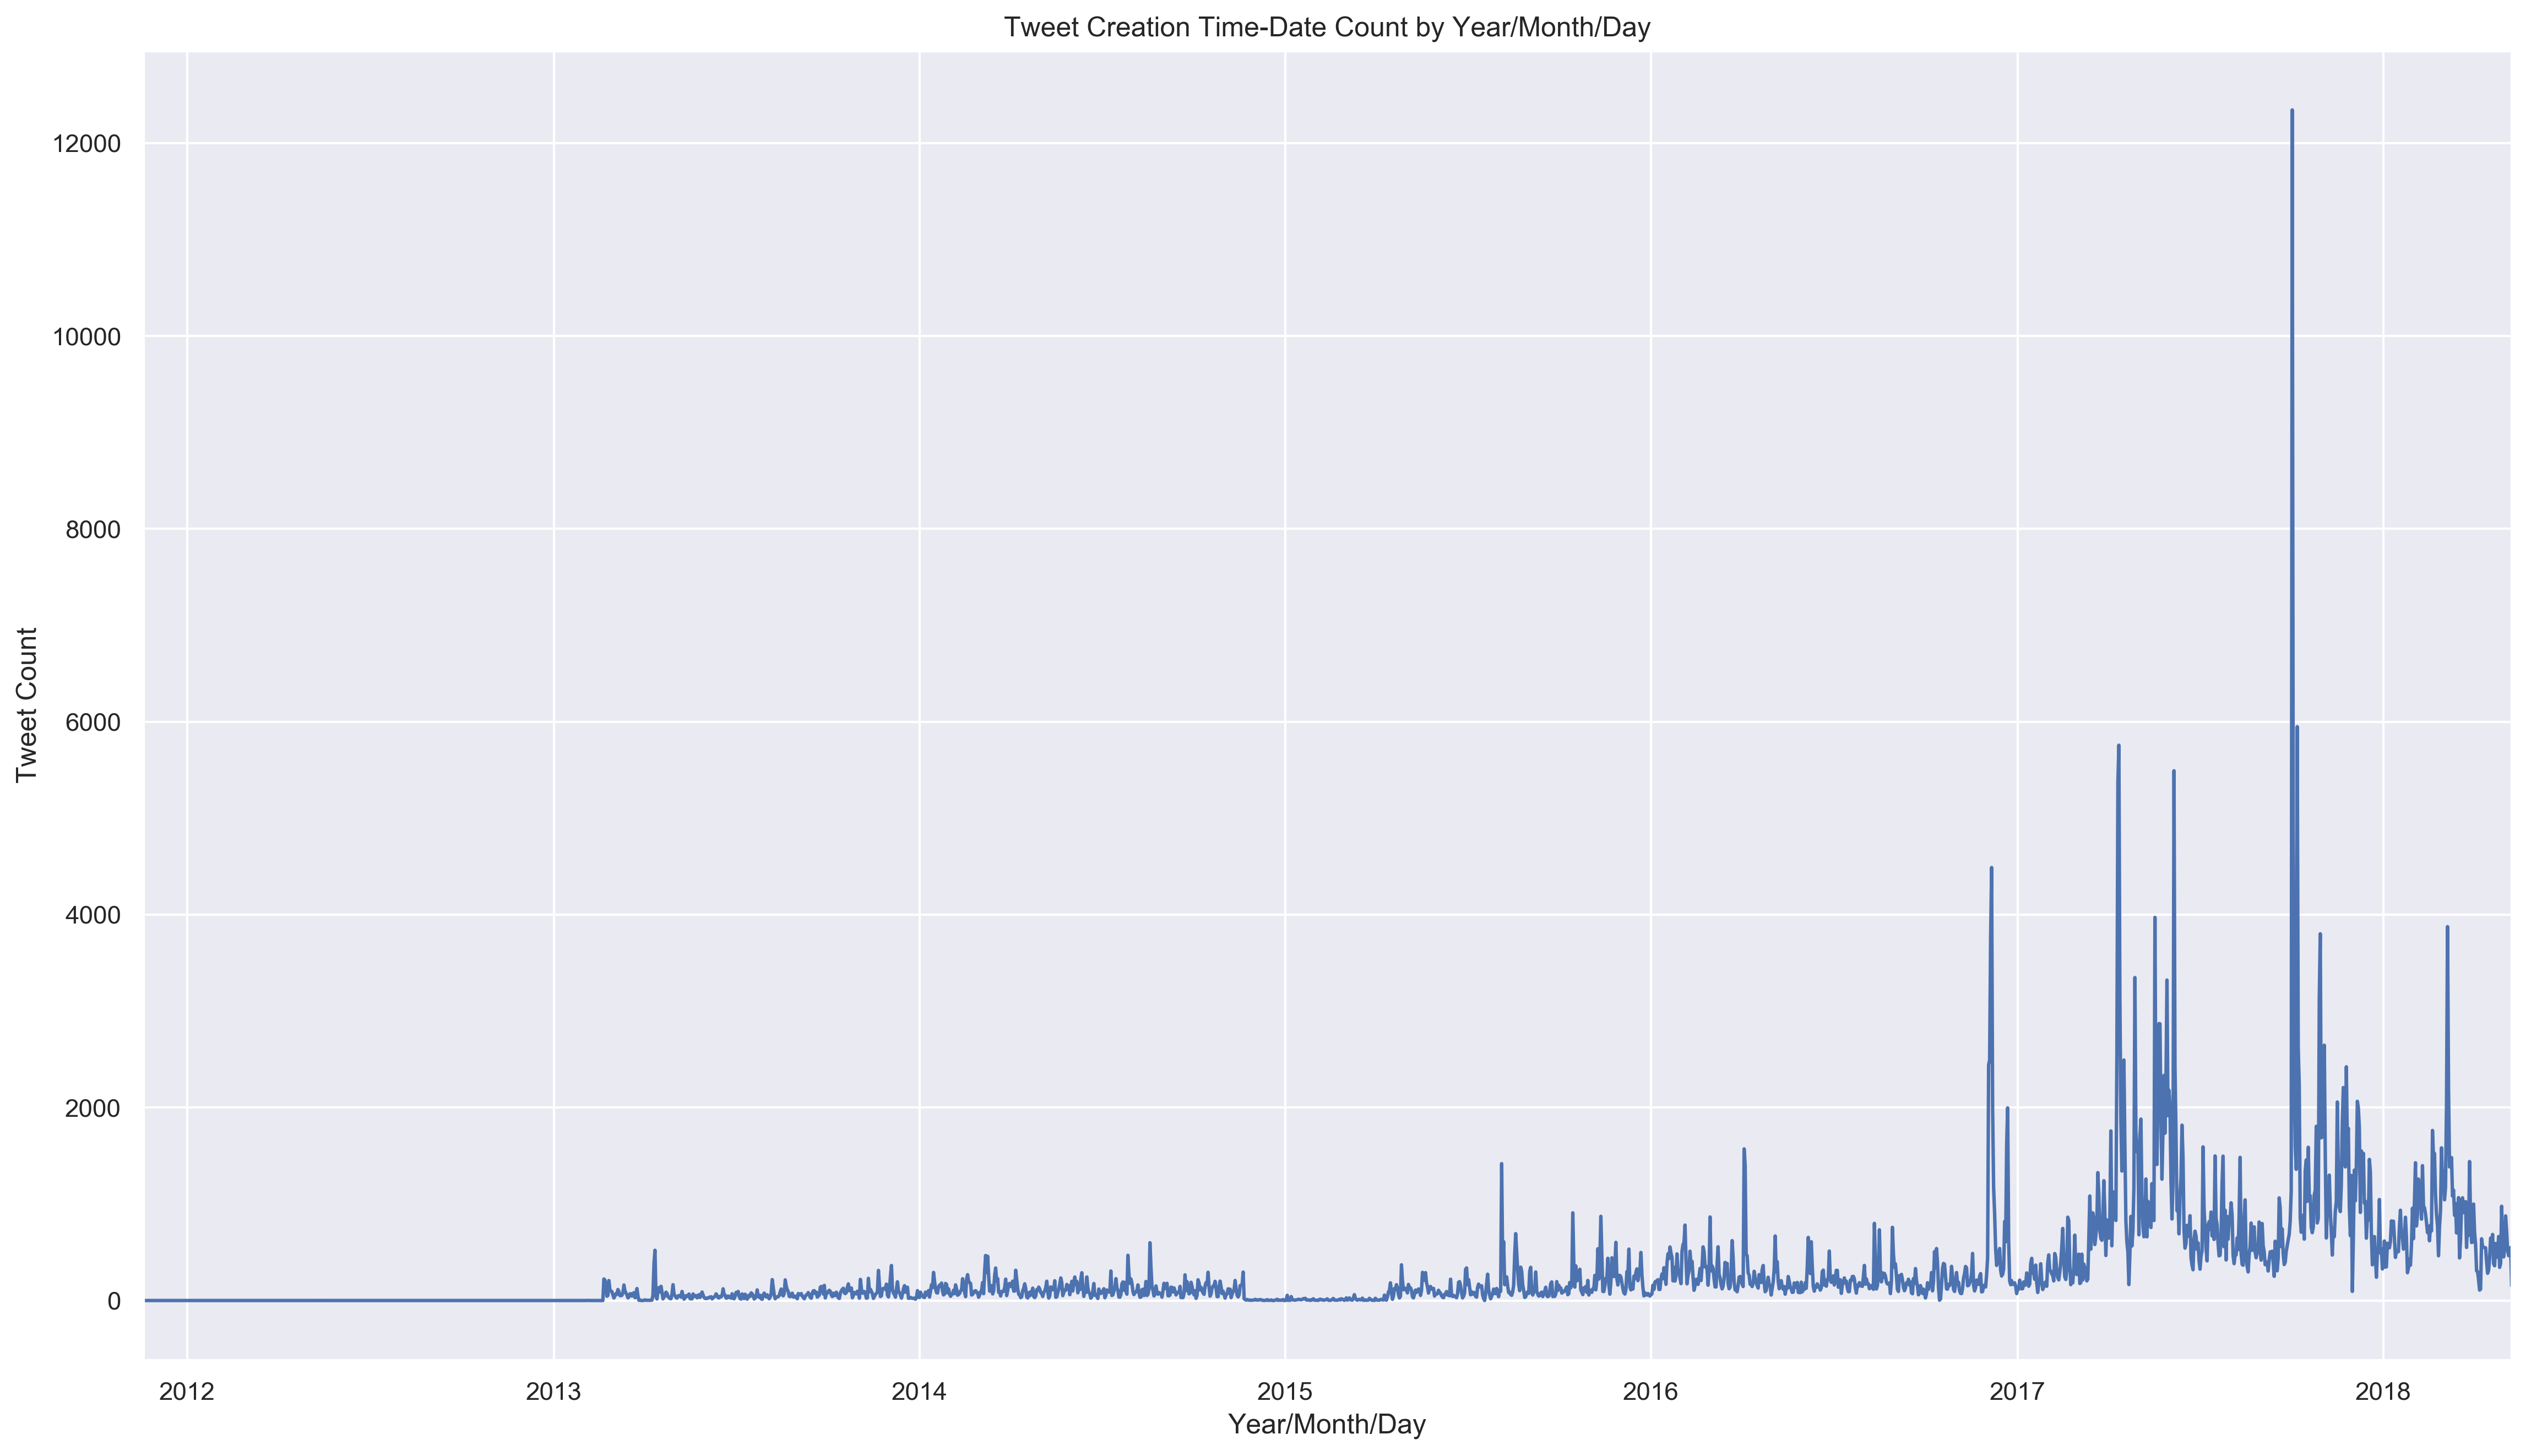

<Figure size 432x288 with 0 Axes>

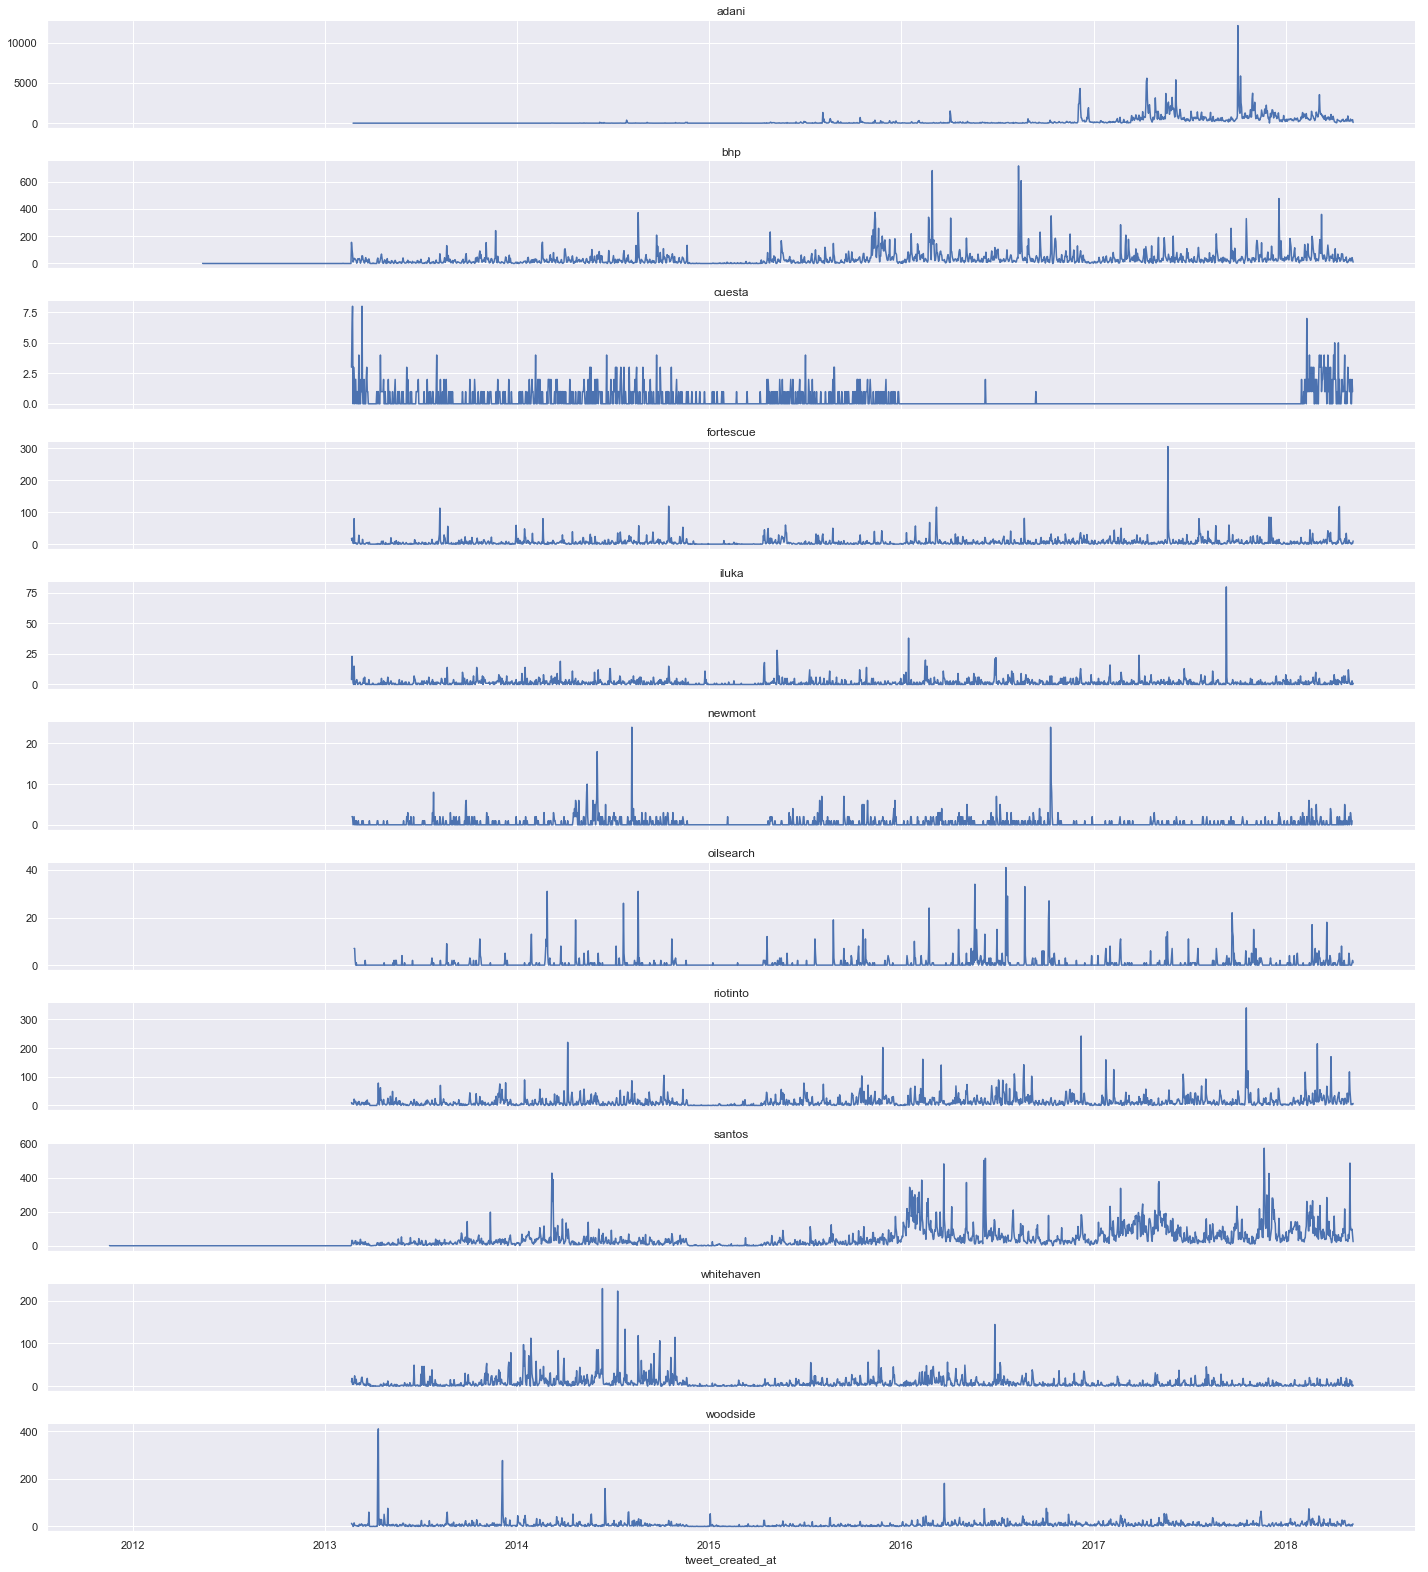

In [7]:
    # Display Tweet count by time-date time series statistics.
    tweet_count_by_timedate_time_series(
        "D:/Dropbox/summer-research-2019/jupyter-notebooks/attribute-datasets/selected-attributes-final3.csv",
        "csv")

<span style="font-family:Papyrus; font-size:1.25em;">

In the first graph, we can see that more of the Tweets were created relatively recently in 2017 and 2018.  The further we go back in time, the fewer Tweets we have.<br>

In the second series of graphs, we can see when the Tweets were created by the company they are associated with.<br>

</span>

### Re-Tweet Statistics for Twitter dataset::

<span style="font-family:Papyrus; font-size:1.25em;">

This function computes statistics related to re-Tweets.  Refer to the code comments in the cell below for specifics.<br>

</span>

In [8]:
def retweet_statistics(tweet_dataframe):
    """
    User-specified attribute statistics and visualizations for the CSV format Twitter dataset.
    Uses the Pandas "value_counts()" function to display unique values for the attribute.
    Suggested use on Boolean attributes or other attributes with only a few unique values.
    Groups user-specified attribute by the company the Tweet is associated with.

    Note: The raw JSON file does not have associated "company" information.

    :param tweet_dataframe: the Twitter dataset in a Pandas dataframe.
    :return: None.
    """

    # Select only rows with one associated company. (don't graph company combos)
    single_company_only_df = tweet_dataframe.loc[tweet_dataframe['multiple_companies_derived_count'] == 1]

    print(f"ReTweeted Attribute Statistics for entire CSV dataset:")
    print(tweet_dataframe["retweeted_derived"].value_counts())
    print()

    print(f"ReTweeted Statistics for CSV dataset by Company:")
    print(f"Number of Tweets that are \"retweeted_derived\" Attribute by associated company: ")
    print(tweet_dataframe.groupby(['company_derived', "retweeted_derived"]).size())
    print()

    # Graph the Statistics.
    print(f"Percentage of All Tweets that Are or Aren't Retweets' by Associated Company: ")
    plt.figure()
    grid = sns.FacetGrid(single_company_only_df[["retweeted_derived", 'company_derived']], col='company_derived',
                         col_wrap=6, ylim=(0, 1))
    grid.map_dataframe(tweet_util.bar_plot, "retweeted_derived").set_titles('{col_name}')\
        .set_xlabels("ReTweet - 0.0 No, 1.0 Yes").set_ylabels("Percentage of All Tweets")
    plt.show()

    plt.figure()
    print(f"Percentage of All Tweets Associated with a Given Company by ReTweet Count")
    grid = sns.FacetGrid(single_company_only_df[['tweet_id', 'company_derived']], col='company_derived', col_wrap=6,
                         ylim=(0, 1),
                         xlim=(0, 10))
    grid.map_dataframe(tweet_util.bar_plot_zipf, 'tweet_id').set_titles('{col_name}').set_xlabels(
        'ReTweeted Count').set_ylabels("Percentage of All Tweets")
    plt.show()

    # Retweet counts of the top Retweeted Tweets.
    print(f"\nReTweet counts for the Top (most) Retweeted Tweets.\n")
    print(single_company_only_df[['company_derived', 'tweet_id']].groupby('company_derived') \
          .apply(lambda x: x['tweet_id'].value_counts().value_counts(normalize=True) \
                 .sort_index(ascending=False).head(3)))

    # Portion of top Retweeted Tweets.
    print(f"\nWhat Percentage of All Tweets for Given Company does the Top (most) Retweeted Tweets Comprise?.\n")
    print(single_company_only_df[['company_derived', 'tweet_id']].groupby('company_derived') \
          .apply(lambda x: x['tweet_id'].value_counts(normalize=True).head()))

<span style="font-family:Papyrus; font-size:1.25em;">
    
We call out data analysis function and pass in the CSV dataset imported at the beginning of the sections detailing our data analysis.<br>
    
</span>

ReTweeted Attribute Statistics for entire CSV dataset:
True     446174
False    224249
Name: retweeted_derived, dtype: int64

ReTweeted Statistics for CSV dataset by Company:
Number of Tweets that are "retweeted_derived" Attribute by associated company: 
company_derived                               retweeted_derived
adani                                         False                109457
                                              True                 321562
adani|bhp                                     False                   101
                                              True                    384
adani|bhp|fortescue|riotinto                  False                     2
adani|bhp|riotinto                            False                     6
                                              True                     11
adani|bhp|riotinto|santos                     False                     1
adani|bhp|santos                              False                     6
               

<Figure size 432x288 with 0 Axes>

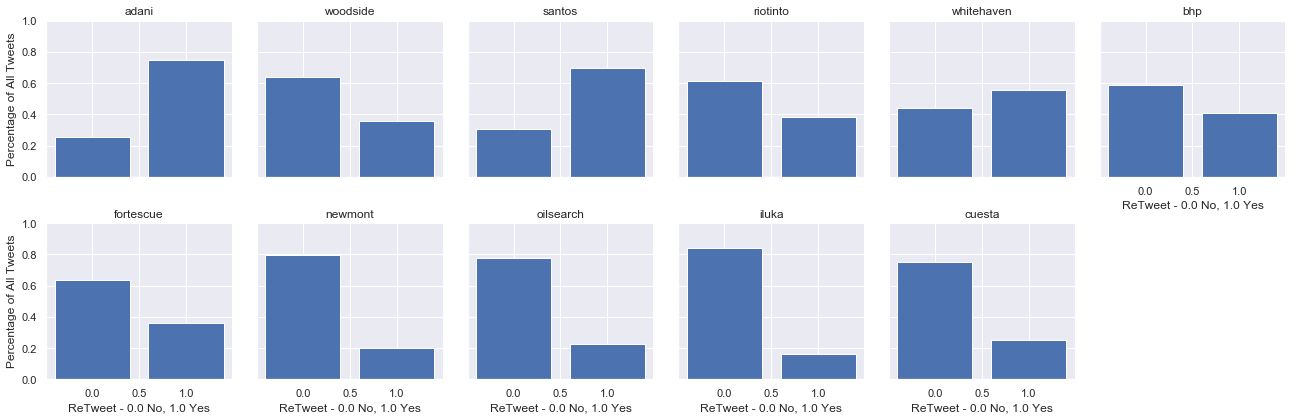

Percentage of All Tweets Associated with a Given Company by ReTweet Count


<Figure size 432x288 with 0 Axes>

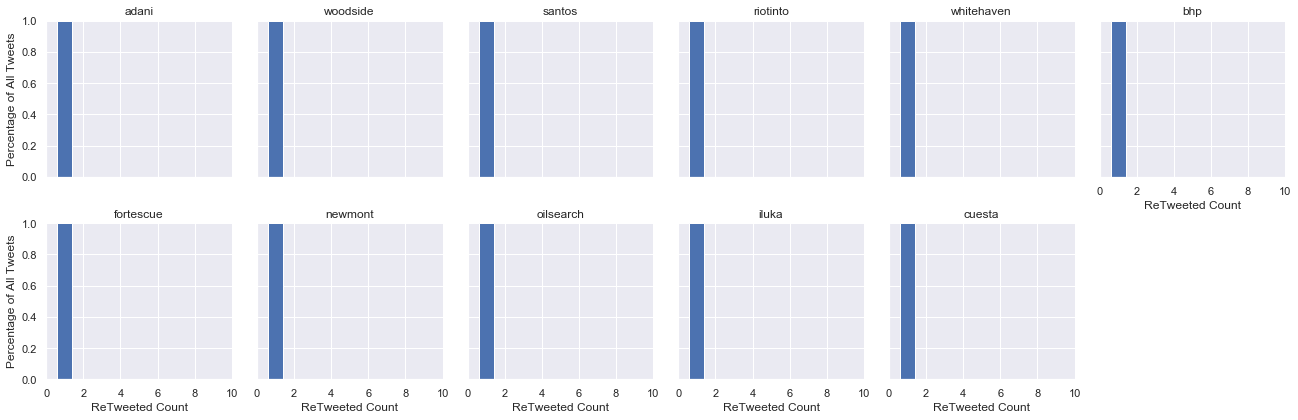


ReTweet counts for the Top (most) Retweeted Tweets.

company_derived   
adani            2    0.000002320089
                 1    0.999997679911
bhp              1    1.000000000000
cuesta           1    1.000000000000
fortescue        1    1.000000000000
iluka            1    1.000000000000
newmont          1    1.000000000000
oilsearch        1    1.000000000000
riotinto         1    1.000000000000
santos           1    1.000000000000
whitehaven       1    1.000000000000
woodside         1    1.000000000000
Name: tweet_id, dtype: float64

What Percentage of All Tweets for Given Company does the Top (most) Retweeted Tweets Comprise?.

company_derived                    
adani            832747709622652928    0.000004640167
                 914790873027637249    0.000002320083
                 919675110797086720    0.000002320083
                 847582345309724672    0.000002320083
                 955281730985869314    0.000002320083
bhp              716951938823118850    0.0000155

In [9]:
    # Determine whether Tweets have been re-Tweeted.
    retweet_statistics(tweet_csv_dataframe)

<span style="font-family:Papyrus; font-size:1.25em;">

The first set of graphs show the proportion of Tweets that are or are not re-tweets by the company the Tweets are associated with.<br>

The second set of graphs show how many times a proportion of Tweets have been re-Tweeted that are associated with a given company.  For example, a bar of 0.4 on the y-axis and 4 on the x-axis would indicate that 40% of all the Tweets associated with that company have been re-Tweeted 4 times.<br>

</span>

### User Statistics for Twitter dataset:

<span style="font-family:Papyrus; font-size:1.25em;">

This function computes statistics related to user screen-names.  Refer to the code comments in the cell below for specifics.<br>

</span>

In [10]:
def user_screen_name_statistics(tweet_dataframe):
    """
    User screen-name by associated company related statistics and visualizations.

    Note: The raw JSON file does not have associated "company" information.

    :param tweet_dataframe: the Twitter dataset in a Pandas dataframe.
    :return: None.
    """
    # Increased limit in order to display all 5 users for all companies and combinations of companies.
    pd.options.display.max_rows = 1000

    # Select only rows with one associated company. (don't graph company combos)
    single_company_only_df = tweet_dataframe.loc[tweet_dataframe['multiple_companies_derived_count'] == 1]

    print("User Statistics for CSV dataset by Company: ")
    print("Top Tweet counts for Unique User by Associated Company.")
    print(
        single_company_only_df[['company_derived', 'user_screen_name']].groupby('company_derived')
            .apply(lambda x: x['user_screen_name'].value_counts(normalize=True).head())
        # .value_counts(normalize=True)\
        # .sort_index(ascending=False).head())
    )
    print()

    # Graph the User Statistics.
    print("Number of Times a Percentage of Users Appears as Tweet Author for a Given Company: ")
    plt.figure()
    grid = sns.FacetGrid(single_company_only_df[['user_screen_name', 'company_derived']], col='company_derived',
                         col_wrap=6,
                         ylim=(0, 1),
                         xlim=(0, 10))
    grid.map_dataframe(tweet_util.bar_plot_zipf, 'user_screen_name').set_titles('{col_name}').set_xlabels(
        'Appearance (Tweet author) Count').set_ylabels("Percentage of all Users")
    plt.show()

<span style="font-family:Papyrus; font-size:1.25em;">

Similar to the graphs above, we only graph Tweets associated with a single company.  Otherwise, the output would be lengthy from graphing all the Tweets that are associated with multiple combinations of companies.<br>

</span>

User Statistics for CSV dataset by Company: 
Top Tweet counts for Unique User by Associated Company.
company_derived                 
adani            WgarNews           0.015242947527
                 GalileeBlockade    0.009025124182
                 MarkPlackett1      0.007512429846
                 SeanBradbery       0.007057693512
                 garland_paige      0.006797844179
bhp              CommSec            0.024057065597
                 aus_business       0.015354251169
                 FinancialReview    0.013551525324
                 icharttop          0.012634621661
                 3novicesSydney     0.009293362550
cuesta           MaAle21            0.087378640777
                 monicapalacios     0.042071197411
                 v4_35              0.037216828479
                 rjstrikers         0.024271844660
                 ABN_Newswire       0.021035598706
fortescue        FortescueNews      0.050288820931
                 aus_business       0.016989466531

<Figure size 432x288 with 0 Axes>

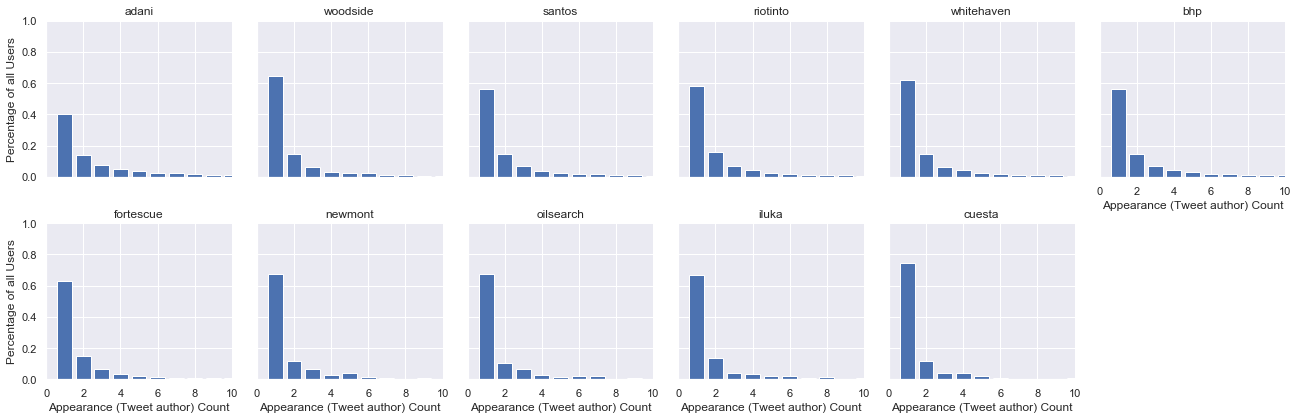

In [11]:
    # Determine the Tweet count for most prolific user by company.
    user_screen_name_statistics(tweet_csv_dataframe)

<span style="font-family:Papyrus; font-size:1.25em;">

The text stats show unique users that accounted for most of the Tweets associated with a given company.<br>

The graphs show the number of times a percentage of all the unique users associated with a given company was the author of a Tweet associated with that company.  For example, a y-axis value of 0.4 and a x-axis value of 4 would indicate that 40% of all users associated with that given company was the author of 4 Tweets associated with that company.<br>

</span>

### Character Count Statistics for Twitter dataset:

<span style="font-family:Papyrus; font-size:1.25em;">

This function provides character counts for all the Tweets associated with a given company.  We visualize this statistic by plotting a relative frequency histogram of those counts for the CSV dataset.<br>

</span>

In [12]:
def tweet_character_counts(tweet_dataframe):
    """
    Character count for Tweet text by associated company related statistics and visualizations.

    Note: The raw JSON file does not have associated "company" information.

    :param tweet_dataframe: the Twitter dataset in a Pandas dataframe.
    :return: None.
    """
    # Select only rows with one associated company. (don't graph company combos)
    single_company_only_df = tweet_dataframe.loc[tweet_dataframe['multiple_companies_derived_count'] == 1]

    print("Character Count Statistics for CSV dataset by Company: ")
    print("Character Count Relative Frequency Histogram: ")
    plt.figure()
    grid = sns.FacetGrid(single_company_only_df[['text_derived', 'company_derived']], col='company_derived', col_wrap=6,
                         ylim=(0, 1))
    grid.map_dataframe(tweet_util.relhist_proc, 'text_derived', bins=10, proc=tweet_util.char_len).set_titles(
        '{col_name}').set_xlabels("# of Characters").set_ylabels("Percentage of all Tweets")
    plt.show()

<span style="font-family:Papyrus; font-size:1.25em;">

We call out data analysis function and pass in the CSV dataset imported into a Pandas dataframe per usual.<br>

</span>

Character Count Statistics for CSV dataset by Company: 
Character Count Relative Frequency Histogram: 


<Figure size 432x288 with 0 Axes>

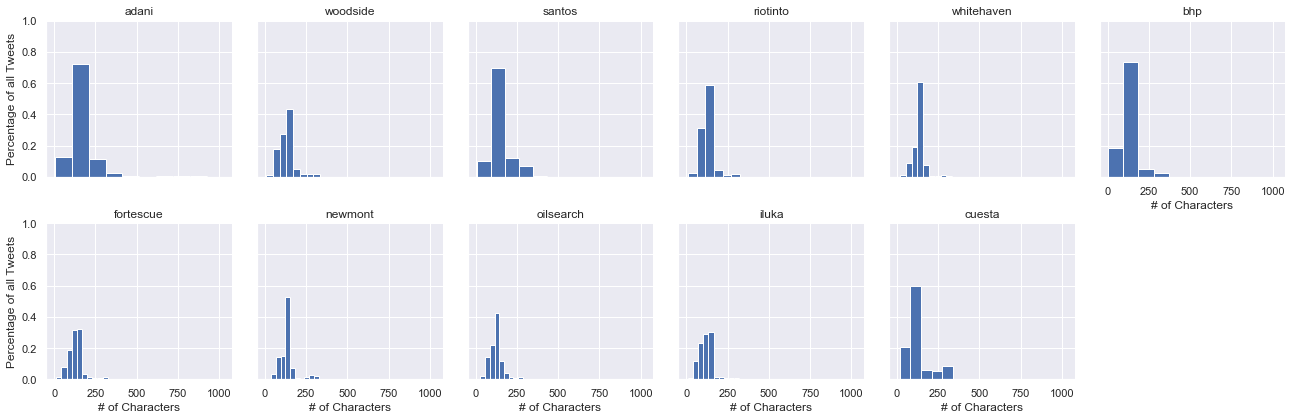

In [13]:
    # Determine the # of characters in Tweets via relative frequency histogram.
    tweet_character_counts(tweet_csv_dataframe)

<span style="font-family:Papyrus; font-size:1.25em;">

The graph outputs appear to show that most Tweets for any given company are relatively long in length.<br>

TODO - see if foreign (non-English) Tweets are responsible for extremely long Tweets due to encoding isdsues.<br>

</span>

### Hashtag Statistics for Twitter dataset:

<span style="font-family:Papyrus; font-size:1.25em;">

This funciton computes hashtag statistics.

</span>

In [14]:
def hashtags(tweet_dataframe):
    """
    Hashtag related statistics and visualizations.

    :param tweet_dataframe: the Twitter dataset in a dataframe.
    :return: None.

    FIXME - graphs function; text stats non-functional (TypeError: 'float' object is not iterable)
    """
    # Select only rows with one associated company. (don't graph company combos)
    single_company_only_df = tweet_dataframe.loc[tweet_dataframe['multiple_companies_derived_count'] == 1]

    # the number of hashtags within tweets
    print(f"The Number of Hashtags within Tweets:")
    single_company_only_df['#hashtags'] = single_company_only_df['tweet_entities_hashtags'].apply(
        lambda x: len(x) if x is not None and not isinstance(x, float) else 0)
    # companies = df['company']

    plt.figure()
    grid = sns.FacetGrid(single_company_only_df[['#hashtags', 'company_derived']], col='company_derived', col_wrap=6,
                         ylim=(0, 1),
                         xlim=(-1, 10))
    grid.map_dataframe(tweet_util.bar_plot, '#hashtags').set_titles('{col_name}') \
        .set_xlabels("# of Hashtags").set_ylabels("Percentage of All Tweets?")
    plt.show()

    # # top hashtags
    # single_company_only_df[['company_derived', 'tweet_entities_hashtags']].groupby('company_derived') \
    #     .apply(lambda x: pd.Series([hashtag
    #                                 for hashtags in x['tweet_entities_hashtags'] if hashtags is not None
    #                                 for hashtag in hashtags]) \
    #            .value_counts(normalize=True) \
    #            .head())
    #
    # # top hashtags, lower-cased
    # single_company_only_df[['company_derived', 'tweet_entities_hashtags']].groupby('company_derived') \
    #     .apply(lambda x: pd.Series([hashtag.lower()
    #                                 for hashtags in x['tweet_entities_hashtags'] if hashtags is not None
    #                                 for hashtag in hashtags]) \
    #            .value_counts(normalize=True) \
    #            .head())

<span style="font-family:Papyrus; font-size:1.25em;">

Call the data analysis function.  We limit outselves to rows in our dataframe where Tweets are only associated with a single company.<br>

</span>

The Number of Hashtags within Tweets:


d:\dropbox\cs344-ai\venv3.6-64bit\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


<Figure size 432x288 with 0 Axes>

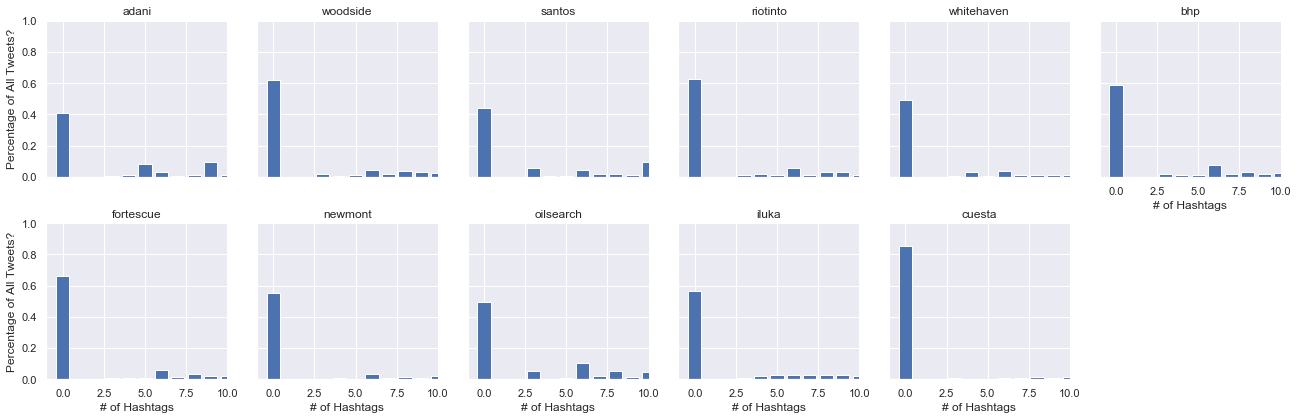

In [15]:
    # Hashtag Statistics.
    hashtags(tweet_csv_dataframe)

<span style="font-family:Papyrus; font-size:1.25em;">

TODO - understand what the output is producing.<br>

</span>

### Mentions Statistics for Twitter dataset:

<span style="font-family:Papyrus; font-size:1.25em;">

This function computes user mentions statistics.<br>

</span>

In [16]:
def mentions(tweet_dataframe):
    """
    Mentions related statistics and visualizations.

    :param tweet_dataframe: the Twitter dataset in a dataframe.
    :return: None.
    """
    # Select only rows with one associated company. (don't graph company combos)
    single_company_only_df = tweet_dataframe.loc[tweet_dataframe['multiple_companies_derived_count'] == 1]

    print(f"tweet_entities_user_mentions_id count divided by length of tweet_dataframe")
    print(tweet_dataframe['tweet_entities_user_mentions_id'].count() / len(tweet_dataframe))

    print(f"tweet_in_reply_to_status_id count divided by length of tweet_dataframe")
    print(tweet_dataframe['tweet_in_reply_to_status_id'].count() / len(tweet_dataframe))

    # the number of mentions within tweets
    print(f"\nThe number of Mentions within the Tweets:")
    single_company_only_df['#mentions'] = single_company_only_df['tweet_entities_user_mentions_id']. \
        apply(lambda x: len(x) if isinstance(x, list) else 0)

    plt.figure()
    grid = sns.FacetGrid(single_company_only_df[['#mentions', 'company_derived']], col='company_derived', col_wrap=6,
                         ylim=(0, 1),
                         xlim=(-1, 10))
    grid.map_dataframe(tweet_util.bar_plot, '#mentions').set_titles('{col_name}') \
        .set_xlabels("Number of Mentions").set_ylabels("Percentage of All Tweets?")
    plt.show()

    # top mentions
    print(f"Top (Most) Mentions for a Company by User Mentions ID")
    print(
        single_company_only_df[['company_derived', 'tweet_entities_user_mentions_id']].groupby('company_derived') \
            .apply(lambda x: pd.Series([mention
                                        for mentions in x['tweet_entities_user_mentions_id'] if mentions is not None
                                        for mention in mentions]) \
                   .value_counts(normalize=True) \
                   .head()))

<span style="font-family:Papyrus; font-size:1.25em;">

Call the data analysis function.  We limit outselves to rows in our dataframe where Tweets are only associated with a single company.<br>

</span>

tweet_entities_user_mentions_id count divided by length of tweet_dataframe
1.0
tweet_in_reply_to_status_id count divided by length of tweet_dataframe
0.058935925527614653

The number of Mentions within the Tweets:


d:\dropbox\cs344-ai\venv3.6-64bit\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<Figure size 432x288 with 0 Axes>

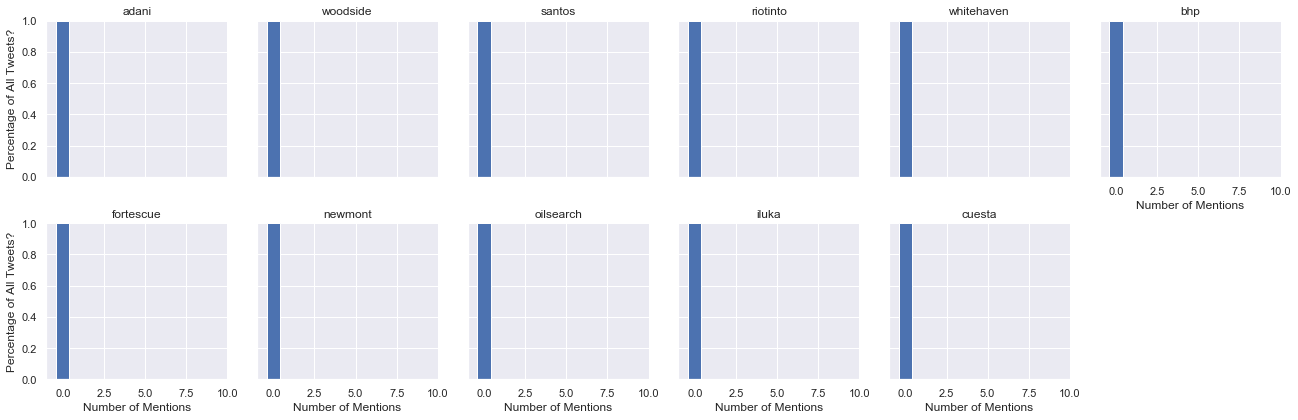

Top (Most) Mentions for a Company by User Mentions ID
company_derived   
adani            2    0.095385937046
                 8    0.093250965394
                 1    0.088271942193
                 3    0.088143829619
                 4    0.086652156758
bhp              ]    0.098920053190
                 [    0.098920053190
                 2    0.097825502118
                 1    0.087550250194
                 0    0.077411817155
cuesta           ]    0.095340944153
                 [    0.095340944153
                 1    0.094106757174
                 2    0.087164455415
                 3    0.079142240049
fortescue        7    0.105690711848
                 ]    0.099926998625
                 [    0.099926998625
                 8    0.099638388537
                 0    0.090046347385
iluka            [    0.167955981695
                 ]    0.167955981695
                 1    0.087056003487
                 2    0.074798431031
                 0    0.068914796252
ne

In [17]:
    # Mentions Statistics.
    mentions(tweet_csv_dataframe)

<span style="font-family:Papyrus; font-size:1.25em;">

TODO - understand what the output is producing.<br>

</span>

### Define necessary attribute/field names for data analysis functions below:

<span style="font-family:Papyrus; font-size:1.25em;">

These Lists containing the attribute/column names in our CSV dataset are necessary for the two data analysis functions below.  These were copy/pasted from our "dataset_processor.adapted.py" Python file which contains the codebase to construct the CSV dataset from the raw JSON dataset.<br>

</span>

In [18]:
    original_fields = ['created_at', 'id', 'full_text', 'in_reply_to_status_id',
                       'in_reply_to_user_id', 'in_reply_to_screen_name',
                       'retweet_count', 'favorite_count', 'lang']

    tweet_fields = ['tweet_created_at', 'tweet_id', 'tweet_full_text', 'tweet_in_reply_to_status_id',
                    'tweet_in_reply_to_user_id', 'tweet_in_reply_to_screen_name',
                    'tweet_retweet_count', 'tweet_favorite_count', 'tweet_lang']

    user_fields = ['user_id', 'user_name', 'user_screen_name', 'user_location', 'user_description',
                   'user_followers_count', 'user_friends_count', 'user_listed_count', 'user_favourites_count',
                   'user_statuses_count', 'user_created_at', 'user_time_zone', 'user_lang']

    entities_fields = ["tweet_entities_expanded_urls", "tweet_entities_hashtags", "tweet_entities_user_mentions_id",
                       "tweet_entities_user_mentions_name", "tweet_entities_user_mentions_screen_name",
                       "tweet_entities_symbols"]

    required_fields = ['retweeted_derived', 'company_derived', 'text_derived',  # "tweet_quoted_status_id",
                       'tweet_url_link_derived', 'multiple_companies_derived', 'multiple_companies_derived_count',
                       'tweet_text_length_derived'] + tweet_fields + user_fields + entities_fields

### Pandas.describe() Analysis for Twitter dataset:

<span style="font-family:Papyrus; font-size:1.25em;">

Here, we output statistics for each attribute/column in the entire CSV dataset.<br>

</span>

In [19]:
def attribute_describe(input_file_path, attribute_name_list, file_type):
    """
    Function utilizes Pandas "describe" function to return dataframe statistics.

    https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/

    Note: This function will not work for attributes whose values are "objects" themselves.
    (can only be numeric type or string)

    :param input_file_path: absolute file path of the dataset in CSV format.
    :param attribute_name_list:  list of names of the attributes we are analyzing.
    :param file_type: type of input file.
    :return: None.
    """
    start_time = time.time()

    if file_type == "csv":
        twitter_data = pd.read_csv(f"{input_file_path}", sep=",")
    elif file_type == "json":
        twitter_data = pd.read_json(f"{input_file_path}",
                                    orient='records',
                                    lines=True)
    else:
        print(f"Invalid file type entered - aborting operation")
        return

    # Create a empty Pandas dataframe.
    dataframe = pd.DataFrame(twitter_data)

    for attribute_name in attribute_name_list:
        print(f"\nPandas describe for \"{attribute_name}\":\n")
        print(dataframe[attribute_name].describe(include='all'))

    end_time = time.time()
    time_elapsed = (end_time - start_time) / 60.0
    log.debug(f"The time taken to visualize the statistics is {time_elapsed} minutes")

<span style="font-family:Papyrus; font-size:1.25em;">

The usual data analysis function call.<br>

</span>

In [20]:
    # Analyze full-text.
    attribute_describe(
        "D:/Dropbox/summer-research-2019/jupyter-notebooks/attribute-datasets/selected-attributes-final3.csv",
        required_fields, "csv")

d:\dropbox\cs344-ai\venv3.6-64bit\lib\site-packages\IPython\core\interactiveshell.py:3215: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):



Pandas describe for "retweeted_derived":

count     670423
unique         2
top         True
freq      446174
Name: retweeted_derived, dtype: object

Pandas describe for "company_derived":

count     669366
unique        92
top        adani
freq      431019
Name: company_derived, dtype: object

Pandas describe for "text_derived":

count                                                                                                                                                              670423
unique                                                                                                                                                             337602
top       RT @AdamBandt: RT if you want Labor &amp; Bill Shorten to stop Adani coal mega-mine by announcing they'll halt the project if they win next election #StopAdani
freq                                                                                                                                                        

count     670401
unique       125
top       Sydney
freq      206820
Name: user_time_zone, dtype: object

Pandas describe for "user_lang":

count     670423
unique        30
top           en
freq      639236
Name: user_lang, dtype: object

Pandas describe for "tweet_entities_expanded_urls":

count                     255098
unique                    121237
top       http://wp.me/p2WW3S-Gg
freq                         956
Name: tweet_entities_expanded_urls, dtype: object

Pandas describe for "tweet_entities_hashtags":

count        367217
unique        53472
top       StopAdani
freq          32203
Name: tweet_entities_hashtags, dtype: object

Pandas describe for "tweet_entities_user_mentions_id":

count     670423
unique     75671
top           []
freq      135073
Name: tweet_entities_user_mentions_id, dtype: object

Pandas describe for "tweet_entities_user_mentions_name":

count                  535350
unique                  75182
top       HRH Terry Australis
freq                    1

<span style="font-family:Papyrus; font-size:1.25em;">

The statistics displayed depend on the type of data present as values for each attribute.  For numerical data, we get count, mean, std, min, percentiles, and max.  For categorical data, we get count, unique, top, and frequency.<Br>

</span>

### NaN versus non-Nan Counts for each Attribute in the Twitter dataset:

<span style="font-family:Papyrus; font-size:1.25em;">

This function displays statistics that count the # of rows/examples in the dataset that are NaN or non-Nan using the Pandas ".isnull().sum()" function chain.<br>

</span>

In [21]:
def count_nan_non_nan(input_file_path, attribute_name_list, file_type):
    """
    Function counts the number of NaN and non-Nan examples in a Pandas dataframe for the specified columns.

    :param input_file_path: absolute file path of the dataset in CSV format.
    :param attribute_name_list:  list of names of the attributes we are analyzing.
    :param file_type: type of input file.
    :return: None.
    """
    start_time = time.time()

    if file_type == "csv":
        twitter_data = pd.read_csv(f"{input_file_path}", sep=",", dtype=object)
    elif file_type == "json":
        twitter_data = pd.read_json(f"{input_file_path}",
                                    orient='records',
                                    lines=True)
    else:
        print(f"Invalid file type entered - aborting operation")
        return

    # Create a empty Pandas dataframe.
    dataframe = pd.DataFrame(twitter_data)

    number_examples = dataframe.shape[0]
    number_attributes = dataframe.shape[1]
    print(f"\nThe number of rows (examples) in the dataframe is {number_examples}")
    print(f"The number of columns (attributes) in the dataframe is {number_attributes}\n")

    for attribute_name in attribute_name_list:
        null_examples = dataframe[attribute_name].isnull().sum()
        non_null_examples = number_examples - null_examples

        print(f"The number of NaN rows for \"{attribute_name}\" is {null_examples}")
        print(f"The number of non-NaN rows for \"{attribute_name}\" is {non_null_examples}\n")

    end_time = time.time()
    time_elapsed = (end_time - start_time) / 60.0
    log.debug(f"The time taken to visualize the statistics is {time_elapsed} minutes")

<span style="font-family:Papyrus; font-size:1.25em;">

The usual data analysis function call.<br>

</span>

In [22]:
    # Determine the number of NaN and non-NaN rows for a attribute in a dataset.
    count_nan_non_nan(
        "D:/Dropbox/summer-research-2019/jupyter-notebooks/attribute-datasets/selected-attributes-final3.csv",
        required_fields, "csv")


The number of rows (examples) in the dataframe is 670423
The number of columns (attributes) in the dataframe is 35

The number of NaN rows for "retweeted_derived" is 0
The number of non-NaN rows for "retweeted_derived" is 670423

The number of NaN rows for "company_derived" is 1057
The number of non-NaN rows for "company_derived" is 669366

The number of NaN rows for "text_derived" is 0
The number of non-NaN rows for "text_derived" is 670423

The number of NaN rows for "tweet_url_link_derived" is 0
The number of non-NaN rows for "tweet_url_link_derived" is 670423

The number of NaN rows for "multiple_companies_derived" is 0
The number of non-NaN rows for "multiple_companies_derived" is 670423

The number of NaN rows for "multiple_companies_derived_count" is 0
The number of non-NaN rows for "multiple_companies_derived_count" is 670423

The number of NaN rows for "tweet_text_length_derived" is 0
The number of non-NaN rows for "tweet_text_length_derived" is 670423

The number of NaN rows

<span style="font-family:Papyrus; font-size:1.25em;">

The attribute name is in double quotations.  Each pair of lines in between a blank line is the statistics for a single attribute.<br>

</span>

## Resources Used:

<span style="font-family:Papyrus; font-size:1.25em;">

**TODO: convert to annotated bibliography**

Dataset Files (obtained from Borg supercomputer):<br>

dataset_slo_20100101-20180510.json<br>
dataset_20100101-20180510.csv<br>

Note: These are large fiels not included in the project GitHub Repository.<br>


- [SLO-analysis.ipynb](SLO-analysis.ipynb)<br>
    -original SLO Twitter data analysis file from Shuntaro Yada.<br>


- https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/intro-to-tweet-json<br>
    -explanation of all data fields in JSON file format for Tweets.<br>


- https://datatofish.com/export-dataframe-to-csv/<br>
- https://datatofish.com/export-pandas-dataframe-json/<br>
    -saving Pandas dataframe to CSV/JSON<br>
    

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html<br>
    -Pandas to_datetime() function call.<br>
    

- https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples/<br>
    -plotting with matplotlib.<br>


</span>

## TODO's:

<span style="font-family:Papyrus; font-size:1.25em;">

Implement further elements from Shuntaro Yada's SLO Twitter Dataset Analysis.<br>

</span>